In [1]:
import pandas as pd
import numpy as np
import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline  
%matplotlib notebook
%pylab

#pca = PCA(n_components=3)
#pca_red = PCA(n_components=3)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [3]:
cells = ["TrkA","TrkB"]
treatments = ["DMSO","PI3Kinh","JNKinh","S6Kinh","RSKinh","MEKinh","AKTinh","JNK8inh"]
treatments_1 = ["PI3Kinh","JNKinh","S6Kinh","RSKinh"]
treatments_2 = ["MEKinh","AKTinh","JNK8inh"]
treatments_actual = ["JNKinh","S6Kinh","RSKinh","MEKinh","AKTinh","JNK8inh"]
replicates_DMSO = 6
replicates_rest = 3

In [4]:
RPPA_total = pd.read_csv('RPPA_data_trusted.csv').set_index("Antibodies")
#RPPA_total

# Normalizing by GAPDH
GAPDH_data = RPPA_total.loc["GAPDH"]
RPPA_total_norm = RPPA_total.divide(GAPDH_data)
RPPA_total_norm = RPPA_total_norm.drop(index="GAPDH")
#RPPA_total_norm.filter(regex='.*TrkA.*DMSO.*')

#RPPA_total_norm

In [5]:
# normalizing by 0 DMSO time point
for cell in cells:
    for treatment in treatments:
        if treatment == "DMSO":
            replicates = replicates_DMSO
        else:
            replicates = replicates_rest
        for replicate_ in range(replicates):
            if treatment in treatments_1:
                replicate = replicate_ + 1
            elif treatment in treatments_2:
                replicate = replicate_ + 4
            else:
                replicate = replicate_ + 1
            #data_row_0 = cell + "_" + treatment + "_" + "0" + "_r" + str(replicate)
            data_row_0 = cell + "_DMSO_0_r" + str(replicate)
            data_row_time = cell + "_" + treatment + "_" + "10" + "_r" + str(replicate)
            RPPA_total_norm[data_row_time] = RPPA_total_norm[data_row_time] / RPPA_total_norm[data_row_0]
            data_row_time = cell + "_" + treatment + "_" + "45" + "_r" + str(replicate)
            RPPA_total_norm[data_row_time] = RPPA_total_norm[data_row_time] / RPPA_total_norm[data_row_0]
            #del RPPA_total_norm[data_row_0]

for cell in cells:
    replicates = replicates_DMSO
    for replicate_ in range(replicates):
        replicate = replicate_ + 1
        #data_row_0 = cell + "_" + treatment + "_" + "0" + "_r" + str(replicate)
        data_row_0 = cell + "_DMSO_0_r" + str(replicate)
        RPPA_total_norm[data_row_0] = RPPA_total_norm[data_row_0] / RPPA_total_norm[data_row_0]
        #del RPPA_total_norm[data_row_0]


# reading data on Trk signalling
Trk_norm = pd.read_csv('RPPA_data_Trk_normalized_new.csv').set_index("Antibodies")
RPPA_total_norm = RPPA_total_norm.append(Trk_norm)
RPPA_total_norm
#RPPA_total_norm.to_csv("RPPA_data_trusted_normalized.csv")

,TrkA_DMSO_0_r1,TrkA_DMSO_0_r2,TrkA_DMSO_0_r3,TrkA_DMSO_10_r1,TrkA_DMSO_10_r2,TrkA_DMSO_10_r3,TrkA_DMSO_45_r1,TrkA_DMSO_45_r2,TrkA_DMSO_45_r3,TrkA_PI3Kinh_0_r1,...,TrkB_DMSO_45_r6,TrkB_MEKinh_45_r4,TrkB_MEKinh_45_r5,TrkB_MEKinh_45_r6,TrkB_AKTinh_45_r4,TrkB_AKTinh_45_r5,TrkB_AKTinh_45_r6,TrkB_JNK8inh_45_r4,TrkB_JNK8inh_45_r5,TrkB_JNK8inh_45_r6
Antibodies,,,,,,,,,,,,,,,,,,,,,
Bad P Ser136,1.0,1.0,1.0,1.195214,1.024246,1.260908,1.195922,0.865755,1.214001,0.495048,...,0.877275,1.057239,0.353452,0.748506,0.509588,0.375864,0.477642,0.908119,0.461701,0.861967
Bad P Ser112,1.0,1.0,1.0,1.501239,0.879089,1.146981,1.559765,1.306904,1.135425,0.482351,...,1.812681,1.277119,1.190415,1.504822,1.198173,1.283662,1.483497,1.309783,1.251183,1.834155
Bak,1.0,1.0,1.0,1.291721,1.079495,1.282790,1.357286,1.165838,1.193006,1.082495,...,0.816592,0.951201,1.111161,0.886745,1.169466,1.242868,0.615858,0.739281,1.019806,0.925118
CrkL P Tyr207,1.0,1.0,1.0,1.338888,0.977276,1.270155,1.327561,1.082845,1.360543,1.141267,...,2.869546,1.574401,1.791657,2.302706,1.545489,1.999032,2.138966,1.568556,1.802026,2.460437
HSP27 (HSPB1) P Ser78,1.0,1.0,1.0,1.079592,1.207202,1.415305,1.163609,1.182375,1.090034,1.979697,...,3.228579,3.544088,3.135005,2.597842,4.490556,4.201606,2.841237,4.812367,3.319634,3.931694
JAK1,1.0,1.0,1.0,1.174982,1.577714,1.642180,1.297287,0.846140,1.387782,0.545441,...,0.838465,1.465764,0.390801,0.442023,1.540149,0.914570,0.464417,1.460072,1.162846,0.397293
MEK1/2 P Ser217/221,1.0,1.0,1.0,1.956513,1.786330,1.881000,1.886883,1.580116,1.347329,19.940027,...,7.916845,5.885692,5.548288,5.405107,6.999285,7.738290,6.750492,7.645293,7.246861,7.330663
Met P Tyr1234,1.0,1.0,1.0,1.268805,1.036906,1.513046,1.310117,1.156775,1.316470,3.655409,...,1.611635,1.140582,1.369982,1.254095,1.100748,1.505909,1.263660,1.142247,1.407963,1.434453
PI3 Kinase p110-alpha,1.0,1.0,1.0,1.179937,1.064686,1.310674,1.175788,1.095459,1.219607,2.829700,...,0.987191,0.901345,1.009220,0.849182,0.922656,1.131931,0.830542,0.943855,1.119138,0.940156


In [6]:
# filling NaNs
TPs = [0,10,45]
for cell in cells:
    for timep in TPs:
        for replicate in range(replicates_DMSO):
            str_n=cell + '_DMSO_' + str(timep) + '_r' + str(replicate+1)
            if np.isnan(RPPA_total_norm[str_n].loc['pTrk']):
                str_reg = cell + '_DMSO_' + str(timep) + '_r.*'
                RPPA_total_norm[str_n].loc['pTrk'] = RPPA_total_norm.loc['pTrk'].filter(regex=str_reg).mean(axis=0,skipna=True)
                #print(RPPA_total_norm.loc['pTrk'].filter(regex=str_reg).mean(axis=0,skipna=True))

controls = RPPA_total_norm.filter(regex='.*DMSO.*')
controls

,TrkA_DMSO_0_r1,TrkA_DMSO_0_r2,TrkA_DMSO_0_r3,TrkA_DMSO_10_r1,TrkA_DMSO_10_r2,TrkA_DMSO_10_r3,TrkA_DMSO_45_r1,TrkA_DMSO_45_r2,TrkA_DMSO_45_r3,TrkB_DMSO_0_r1,...,TrkA_DMSO_45_r6,TrkB_DMSO_0_r4,TrkB_DMSO_0_r5,TrkB_DMSO_0_r6,TrkB_DMSO_10_r4,TrkB_DMSO_10_r5,TrkB_DMSO_10_r6,TrkB_DMSO_45_r4,TrkB_DMSO_45_r5,TrkB_DMSO_45_r6
Antibodies,,,,,,,,,,,,,,,,,,,,,
Bad P Ser136,1.0,1.0,1.0,1.195214,1.024246,1.260908,1.195922,0.865755,1.214001,1.0,...,1.153764,1.0,1.0,1.0,0.911601,1.092188,0.857805,0.504786,0.456516,0.877275
Bad P Ser112,1.0,1.0,1.0,1.501239,0.879089,1.146981,1.559765,1.306904,1.135425,1.0,...,1.168979,1.0,1.0,1.0,1.266108,0.958668,1.230827,1.093156,1.230254,1.812681
Bak,1.0,1.0,1.0,1.291721,1.079495,1.282790,1.357286,1.165838,1.193006,1.0,...,0.945322,1.0,1.0,1.0,1.480998,1.403273,0.983929,0.901873,0.753822,0.816592
CrkL P Tyr207,1.0,1.0,1.0,1.338888,0.977276,1.270155,1.327561,1.082845,1.360543,1.0,...,1.071355,1.0,1.0,1.0,1.496703,2.282126,1.965369,1.308922,1.878024,2.869546
HSP27 (HSPB1) P Ser78,1.0,1.0,1.0,1.079592,1.207202,1.415305,1.163609,1.182375,1.090034,1.0,...,0.803627,1.0,1.0,1.0,6.373076,4.754273,3.391033,3.135229,3.251377,3.228579
JAK1,1.0,1.0,1.0,1.174982,1.577714,1.642180,1.297287,0.846140,1.387782,1.0,...,0.406112,1.0,1.0,1.0,1.393403,1.310530,0.954117,1.196035,1.089896,0.838465
MEK1/2 P Ser217/221,1.0,1.0,1.0,1.956513,1.786330,1.881000,1.886883,1.580116,1.347329,1.0,...,1.495595,1.0,1.0,1.0,8.467022,6.737725,5.992149,6.151833,6.915613,7.916845
Met P Tyr1234,1.0,1.0,1.0,1.268805,1.036906,1.513046,1.310117,1.156775,1.316470,1.0,...,1.085244,1.0,1.0,1.0,1.564859,1.458712,1.251227,1.081242,1.357966,1.611635
PI3 Kinase p110-alpha,1.0,1.0,1.0,1.179937,1.064686,1.310674,1.175788,1.095459,1.219607,1.0,...,0.973009,1.0,1.0,1.0,1.209305,1.059484,0.896086,0.875213,0.942722,0.987191


In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(controls.filter(regex=".*DMSO_[^0].*").transpose())
for i in range(len(kmeans.labels_)):
    print(controls.filter(regex=".*DMSO_[^0].*").columns[i] + " - " + str(kmeans.labels_[i]))
#print(len(kmeans.labels_))
#controls.filter(regex=".*DMSO_[^0].*")

TrkA_DMSO_10_r1 - 0
TrkA_DMSO_10_r2 - 0
TrkA_DMSO_10_r3 - 0
TrkA_DMSO_45_r1 - 0
TrkA_DMSO_45_r2 - 0
TrkA_DMSO_45_r3 - 0
TrkB_DMSO_10_r1 - 1
TrkB_DMSO_10_r2 - 1
TrkB_DMSO_10_r3 - 1
TrkB_DMSO_45_r1 - 1
TrkB_DMSO_45_r2 - 1
TrkB_DMSO_45_r3 - 1
TrkA_DMSO_10_r4 - 0
TrkA_DMSO_10_r5 - 0
TrkA_DMSO_10_r6 - 0
TrkA_DMSO_45_r4 - 0
TrkA_DMSO_45_r5 - 0
TrkA_DMSO_45_r6 - 0
TrkB_DMSO_10_r4 - 1
TrkB_DMSO_10_r5 - 1
TrkB_DMSO_10_r6 - 1
TrkB_DMSO_45_r4 - 1
TrkB_DMSO_45_r5 - 1
TrkB_DMSO_45_r6 - 1


In [8]:
#building STV

controls = RPPA_total_norm.filter(regex='.*DMSO_[^0].*')
cls = [0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1]

svc = SVC(kernel='linear')
svc.fit(controls.transpose(),cls)

# here is our STV
TrkA_center = RPPA_total_norm.filter(regex='TrkA.*DMSO_[^0].*').sum(axis=1) / len(RPPA_total_norm.filter(regex='TrkA.*DMSO_[^0].*').columns)
TrkB_center = RPPA_total_norm.filter(regex='TrkB.*DMSO_[^0].*').sum(axis=1) / len(RPPA_total_norm.filter(regex='TrkB.*DMSO_[^0].*').columns)
#norm_vec = - svc.coef_[0]/linalg.norm(svc.coef_[0])
norm_vec = (TrkB_center - TrkA_center)/linalg.norm(TrkB_center - TrkA_center)
RPPA_total_norm.insert(0,"norm_vec",norm_vec)
# plus sign means propensity towards TrkA state
# minus sign means propensity towards TrkB state (e.g. ppERK or pAKT)

# sort antibodies by contribution to STV
RPPA_total_norm.sort_values(by='norm_vec')
#RPPA_total_norm.to_csv("STV ranking.csv")

,norm_vec,TrkA_DMSO_0_r1,TrkA_DMSO_0_r2,TrkA_DMSO_0_r3,TrkA_DMSO_10_r1,TrkA_DMSO_10_r2,TrkA_DMSO_10_r3,TrkA_DMSO_45_r1,TrkA_DMSO_45_r2,TrkA_DMSO_45_r3,...,TrkB_DMSO_45_r6,TrkB_MEKinh_45_r4,TrkB_MEKinh_45_r5,TrkB_MEKinh_45_r6,TrkB_AKTinh_45_r4,TrkB_AKTinh_45_r5,TrkB_AKTinh_45_r6,TrkB_JNK8inh_45_r4,TrkB_JNK8inh_45_r5,TrkB_JNK8inh_45_r6
Antibodies,,,,,,,,,,,,,,,,,,,,,
Caspase 3 cleaved,-0.063582,1.0,1.0,1.0,1.993175,1.173172,1.566501,2.137101,1.118907,1.120055,...,1.065722,1.274657,1.509392,0.741371,1.321198,1.771062,0.936652,0.525893,1.391759,0.944195
Src,-0.026383,1.0,1.0,1.0,1.141311,0.930196,1.242927,1.036205,0.952202,1.039633,...,0.592791,0.742338,0.589300,0.602478,0.721397,0.646385,0.583933,0.850282,0.713769,0.687086
Bad P Ser136,-0.024256,1.0,1.0,1.0,1.195214,1.024246,1.260908,1.195922,0.865755,1.214001,...,0.877275,1.057239,0.353452,0.748506,0.509588,0.375864,0.477642,0.908119,0.461701,0.861967
PKC-zeta,-0.021307,1.0,1.0,1.0,1.207725,1.026568,1.465118,1.164160,1.155453,1.237001,...,1.694520,1.357598,0.399973,0.855702,0.948719,0.654343,1.094418,0.653891,0.606135,1.193897
Raf P Ser259,-0.020970,1.0,1.0,1.0,1.135425,0.929860,1.153372,1.302875,1.091787,1.205705,...,1.168623,0.808721,0.718761,0.980193,0.845761,0.803409,1.104386,0.868741,0.786874,1.269732
p53 P Ser15,-0.018528,1.0,1.0,1.0,1.141996,1.286620,1.760710,1.308151,1.241082,1.187750,...,1.102019,1.035210,0.990604,0.709176,1.099008,0.523333,0.750520,1.057217,1.850406,0.910824
"c-Myc P Thr58,Ser62",-0.017606,1.0,1.0,1.0,1.386466,1.047921,1.193142,1.153867,0.994587,0.991336,...,1.934853,0.635530,0.965131,1.429132,0.614855,1.047582,1.205505,0.791609,1.127177,1.148309
Akt,-0.015253,1.0,1.0,1.0,1.195059,0.940827,1.215316,1.074033,0.976921,1.030529,...,0.926618,0.682245,0.752950,0.718561,0.837045,0.957684,0.888370,0.715780,0.750618,0.801166
SAPK/JNK (JNK2),-0.014839,1.0,1.0,1.0,1.521273,1.331280,1.564541,1.492209,1.192586,1.429728,...,0.751694,1.443996,1.313838,0.694836,1.253554,1.348344,0.570204,1.252936,1.136419,0.817095


In [9]:
# delete pTrk row
RPPA_total_norm = RPPA_total_norm.drop(index="pTrk")

In [10]:
controls = RPPA_total_norm.filter(regex='.*DMSO.*')
# visualizing separation in PCA space
pca = PCA(n_components=3)
Spca = pca.fit_transform(controls.transpose())
PCAweights = pca.components_.transpose()
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
#print(controls.columns)
PCA_RPPA = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=controls.columns)
#PCA_RPPA
#PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,2]

Explained variances by components:  [0.67782992 0.12531919 0.09325035] total variance explained:  0.8963994568591231


In [11]:
cls = [0,0,0,1,1,1,1,1,1,0,0,0,2,2,2,2,2,2,0,0,0,1,1,1,1,1,1,0,0,0,2,2,2,2,2,2]

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(PCA_RPPA,cls)

norm_vec_PCA=[]
for vec in svc_PCA.coef_:
    norm_vec_PCA.append(-vec/linalg.norm(vec))

print(norm_vec_PCA)
#print(svc_PCA.intercept_)

[array([ 0.94056903, -0.24942526, -0.23047114]), array([ 0.95345157, -0.0994399 ,  0.28467843]), array([ 0.92938071, -0.2217707 ,  0.29507499])]


<IPython.core.display.Javascript object>


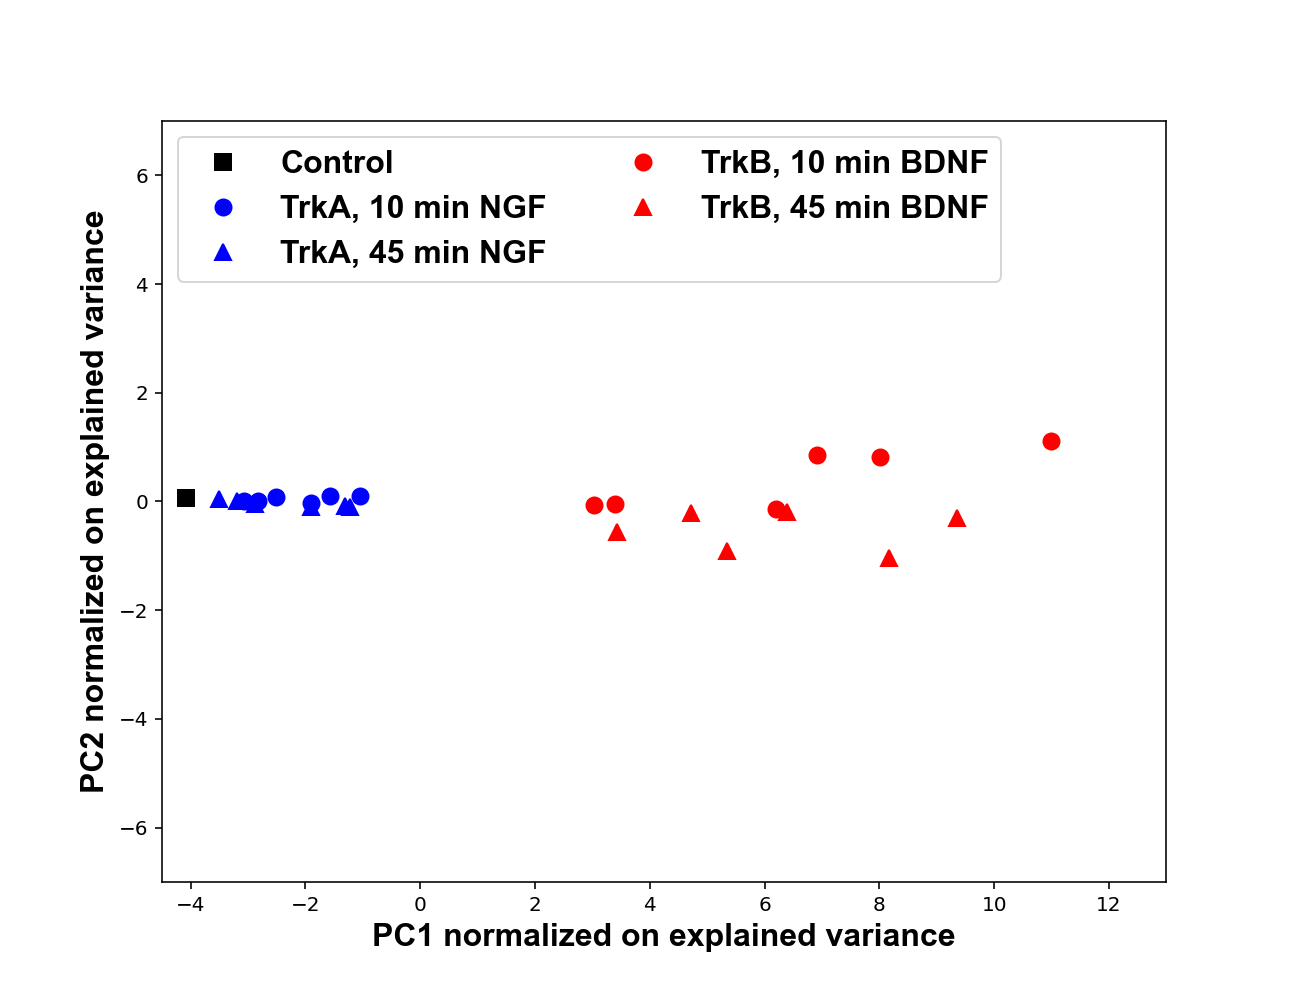

In [12]:
# plotting scaled PCA

# visualising normalized on GAPDH data inclusing 0 time point
# plotting results
fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

xscale = pca.explained_variance_ratio_[0]
yscale = pca.explained_variance_ratio_[1]

y0 = lambda x: (-svc_PCA.intercept_[0]-svc_PCA.coef_[0][0]*x) / svc_PCA.coef_[0][1]
y1 = lambda x: (-svc_PCA.intercept_[1]-svc_PCA.coef_[1][0]*x) / svc_PCA.coef_[1][1]
y2 = lambda x: (-svc_PCA.intercept_[2]-svc_PCA.coef_[2][0]*x) / svc_PCA.coef_[2][1]
xs = np.linspace(min(Spca[:,0])-1,max(Spca[:,0]),10)
#ax.plot(xs*xscale,y0(xs)*yscale,color='black',linewidth=3)
#ax.plot(xs,y2(xs)*yscale,color='black',linewidth=3)

ax.plot(PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,0]*xscale,PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,1]*yscale,'s',color='black',label='Control',ms=8) 
ax.plot(PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,0]*xscale,PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,1]*yscale,'o',color='blue',label='TrkA, 10 min NGF',ms=8) 
ax.plot(PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,0]*xscale,PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,1]*yscale,'^',color='blue',label='TrkA, 45 min NGF',ms=8) 

#ax.plot(PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,0]*xscale,PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,1]*yscale,'s',color='black',label='TrkB, control',ms=8) 
ax.plot(PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,0]*xscale,PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,1]*yscale,'o',color='red',label='TrkB, 10 min BDNF',ms=8) 
ax.plot(PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,0]*xscale,PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,1]*yscale,'^',color='red',label='TrkB, 45 min BDNF',ms=8) 

ax.set_xlabel('PC1 normalized on explained variance',**fontLabel)
ax.set_ylabel('PC2 normalized on explained variance',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

ax.set_xlim(-4.5,13)
ax.set_ylim(-7,7)

ax.legend(numpoints=1,prop=fontLabel,loc='upper left',ncol=2)
plt.show()


<IPython.core.display.Javascript object>


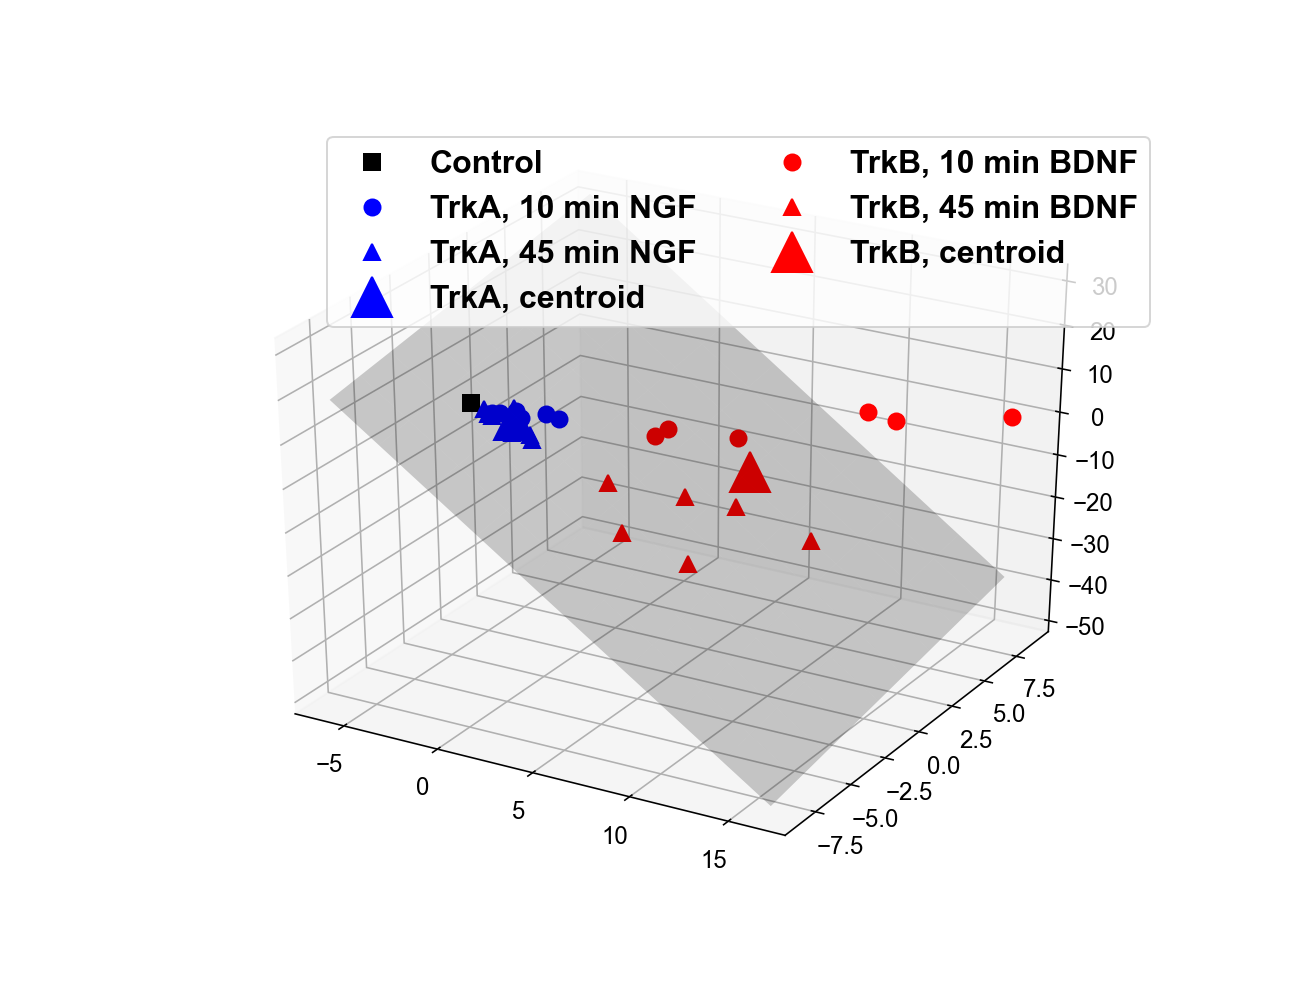

In [13]:
# visualising normalized on GAPDH data inclusing 0 time point
# plotting results
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

z0 = lambda x,y: (-svc_PCA.intercept_[0]-svc_PCA.coef_[0][0]*x-svc_PCA.coef_[0][1]*y) / svc_PCA.coef_[0][2]
z1 = lambda x,y: (-svc_PCA.intercept_[1]-svc_PCA.coef_[1][0]*x-svc_PCA.coef_[1][1]*y) / svc_PCA.coef_[1][2]
z2 = lambda x,y: (-svc_PCA.intercept_[2]-svc_PCA.coef_[2][0]*x-svc_PCA.coef_[2][1]*y) / svc_PCA.coef_[2][2]
tmpx = np.linspace(min(Spca[:,0]),max(Spca[:,0]),10)
tmpy = np.linspace(min(Spca[:,1]),max(Spca[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)

#ax.plot_surface(xs, ys, z0(xs,ys),color='black',linewidth=0,alpha=0.2)
ax.plot_surface(xs, ys, z2(xs,ys),color='black',linewidth=0,alpha=0.2)

ax.plot3D(PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,2],'s',color='black',label='Control',ms=8) 

ax.plot3D(PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,2],'o',color='blue',label='TrkA, 10 min NGF',ms=8) 
ax.plot3D(PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,2],'^',color='blue',label='TrkA, 45 min NGF',ms=8) 
ax.plot3D([np.mean(PCA_RPPA.filter(regex='TrkA_DMSO_[^0].*',axis=0).iloc[:,0])],[np.mean(PCA_RPPA.filter(regex='TrkA_DMSO_[^0].*',axis=0).iloc[:,1])],[np.mean(PCA_RPPA.filter(regex='TrkA_DMSO_[^0].*',axis=0).iloc[:,2])],'^',color='blue',label='TrkA, centroid',ms=20) 

#ax.plot3D(PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,2],'s',color='black',label='TrkB, control',ms=8) 
ax.plot3D(PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,2],'o',color='red',label='TrkB, 10 min BDNF',ms=8) 
ax.plot3D(PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,2],'^',color='red',label='TrkB, 45 min BDNF',ms=8) 
ax.plot3D([np.mean(PCA_RPPA.filter(regex='TrkB_DMSO_[^0].*',axis=0).iloc[:,0])],[np.mean(PCA_RPPA.filter(regex='TrkB_DMSO_[^0].*',axis=0).iloc[:,1])],[np.mean(PCA_RPPA.filter(regex='TrkB_DMSO_[^0].*',axis=0).iloc[:,2])],'^',color='red',label='TrkB, centroid',ms=20) 

#ax.plot(PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkA_DMSO_0.*',axis=0).iloc[:,2],'s',color='red',label='TrkA, 0 min',ms=8) 
#ax.plot(PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkA_DMSO_10.*',axis=0).iloc[:,2],'o',color='red',label='TrkA, 10 min',ms=8) 
#ax.plot3D(PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,2],'^',color='red',label='TrkA, 45 min',ms=8) 

#ax.plot(PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkB_DMSO_0.*',axis=0).iloc[:,2],'s',color='blue',label='TrkB, 0 min',ms=8) 
#ax.plot(PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkB_DMSO_10.*',axis=0).iloc[:,2],'o',color='blue',label='TrkB, 10 min',ms=8) 
#ax.plot3D(PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,2],'^',color='blue',label='TrkB, 45 min',ms=8) 

#ax.set_xlabel('PC1',**fontLabel)
#ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-7,17)
#ax.set_ylim(-10,10)

ax.legend(numpoints=1,prop=fontLabel,ncol=2)
plt.show()


<IPython.core.display.Javascript object>


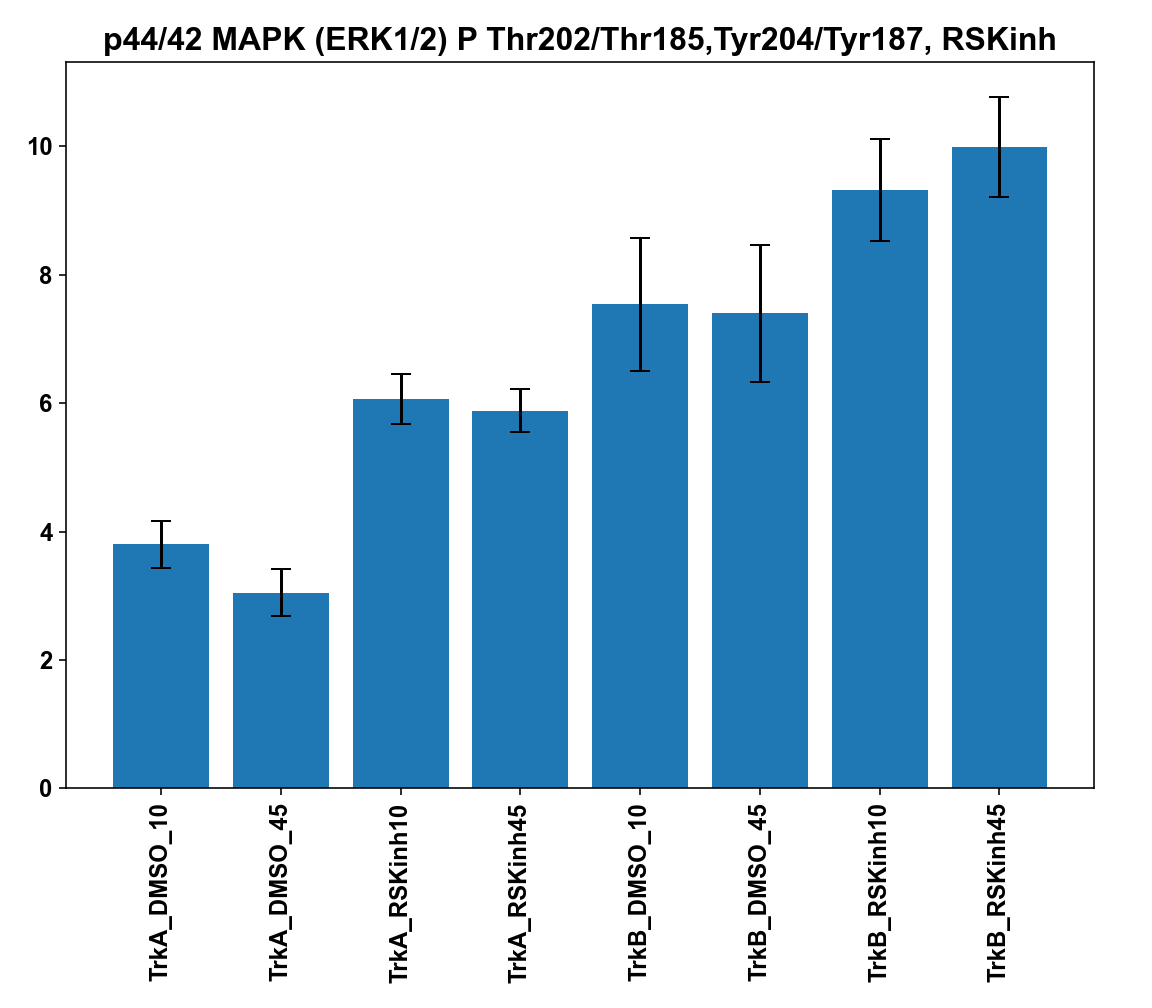

In [14]:
# making bar plot for specific antibody and perturbation
# a handy (IMHO) tool to quickly look for some specific data
AB_name = "p44/42 MAPK (ERK1/2) P Thr202/Thr185,Tyr204/Tyr187"
ptb = "RSKinh"

TrkA_10_ctrl = statistics.mean(controls.loc[AB_name].filter(regex='TrkA.*DMSO.*10.*'))
TrkA_10_ctrl_err = stats.sem(controls.loc[AB_name].filter(regex='TrkA.*DMSO.*10.*'))
#TrkA_10_ctrl_data = controls.loc[AB_name].filter(regex='TrkA.*DMSO.*10.*')
TrkA_45_ctrl = statistics.mean(controls.loc[AB_name].filter(regex='TrkA.*DMSO.*45.*'))
TrkA_45_ctrl_err = stats.sem(controls.loc[AB_name].filter(regex='TrkA.*DMSO.*45.*'))
#TrkA_45_ctrl_data = controls.loc[AB_name].filter(regex='TrkA.*DMSO.*45.*')
#print(TrkA_10_ctrl)
#print(TrkA_10_ctrl_err)
#print(TrkA_45_ctrl)
#print(TrkA_45_ctrl_err)

TrkB_10_ctrl = statistics.mean(controls.loc[AB_name].filter(regex='TrkB.*DMSO.*10.*'))
TrkB_10_ctrl_err = stats.sem(controls.loc[AB_name].filter(regex='TrkB.*DMSO.*10.*'))
TrkB_45_ctrl = statistics.mean(controls.loc[AB_name].filter(regex='TrkB.*DMSO.*45.*'))
TrkB_45_ctrl_err = stats.sem(controls.loc[AB_name].filter(regex='TrkB.*DMSO.*45.*'))

TrkA_0_pert = statistics.mean(RPPA_total_norm.loc[AB_name].filter(regex='TrkA.*'+ptb+'.*0.*'))
TrkA_0_pert_err = stats.sem(RPPA_total_norm.loc[AB_name].filter(regex='TrkA.*'+ptb+'.*0.*'))
TrkA_10_pert = statistics.mean(RPPA_total_norm.loc[AB_name].filter(regex='TrkA.*'+ptb+'.*10.*'))
TrkA_10_pert_err = stats.sem(RPPA_total_norm.loc[AB_name].filter(regex='TrkA.*'+ptb+'.*10.*'))
TrkA_45_pert = statistics.mean(RPPA_total_norm.loc[AB_name].filter(regex='TrkA.*'+ptb+'.*45.*'))
TrkA_45_pert_err = stats.sem(RPPA_total_norm.loc[AB_name].filter(regex='TrkA.*'+ptb+'.*45.*'))
#print(TrkA_10_pert)
#print(TrkA_10_pert_err)
#print(TrkA_45_pert)
#print(TrkA_45_pert_err)

TrkB_0_pert = statistics.mean(RPPA_total_norm.loc[AB_name].filter(regex='TrkB.*'+ptb+'.*0.*'))
TrkB_0_pert_err = stats.sem(RPPA_total_norm.loc[AB_name].filter(regex='TrkB.*'+ptb+'.*0.*'))
TrkB_10_pert = statistics.mean(RPPA_total_norm.loc[AB_name].filter(regex='TrkB.*'+ptb+'.*10.*'))
TrkB_10_pert_err = stats.sem(RPPA_total_norm.loc[AB_name].filter(regex='TrkB.*'+ptb+'.*10.*'))
TrkB_45_pert = statistics.mean(RPPA_total_norm.loc[AB_name].filter(regex='TrkB.*'+ptb+'.*45.*'))
TrkB_45_pert_err = stats.sem(RPPA_total_norm.loc[AB_name].filter(regex='TrkB.*'+ptb+'.*45.*'))

names_0 = ['TrkA_DMSO_0','TrkA_DMSO_10','TrkA_DMSO_45','TrkA_'+ptb+'0','TrkA_'+ptb+'10','TrkA_'+ptb+'45','TrkB_DMSO_0','TrkB_DMSO_10','TrkB_DMSO_45','TrkB_'+ptb+'0','TrkB_'+ptb+'10','TrkB_'+ptb+'45']
names = ['TrkA_DMSO_10','TrkA_DMSO_45','TrkA_'+ptb+'10','TrkA_'+ptb+'45','TrkB_DMSO_10','TrkB_DMSO_45','TrkB_'+ptb+'10','TrkB_'+ptb+'45']
values_0 = [1.0,TrkA_10_ctrl,TrkA_45_ctrl,TrkA_0_pert,TrkA_10_pert,TrkA_45_pert,1.0,TrkB_10_ctrl,TrkB_45_ctrl,TrkB_0_pert,TrkB_10_pert,TrkB_45_pert]
values = [TrkA_10_ctrl,TrkA_45_ctrl,TrkA_10_pert,TrkA_45_pert,TrkB_10_ctrl,TrkB_45_ctrl,TrkB_10_pert,TrkB_45_pert]
errs_0 = [0.0,TrkA_10_ctrl_err,TrkA_45_ctrl_err,TrkA_0_pert_err,TrkA_10_pert_err,TrkA_45_pert_err,0.0,TrkB_10_ctrl_err,TrkB_45_ctrl_err,TrkB_0_pert_err,TrkB_10_pert_err,TrkB_45_pert_err]
errs = [TrkA_10_ctrl_err,TrkA_45_ctrl_err,TrkA_10_pert_err,TrkA_45_pert_err,TrkB_10_ctrl_err,TrkB_45_ctrl_err,TrkB_10_pert_err,TrkB_45_pert_err]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

plt.title(AB_name+', '+ptb,**fontTitle)
#plt.bar(names_0,values_0,yerr=errs_0,capsize=5)
plt.bar(names,values,yerr=errs,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [15]:
# now calculating dot products between perturbation vectors and STV without taking into account data on RTK and perturbed modules

# assigining outputs to different modules
RTK_module_names = ['ErbB-2/Her2/EGFR P Tyr1248/Tyr1173','ErbB-3/Her3/EGFR P Tyr1289','EGFR P Tyr1173','Met P Tyr1234','Met P Tyr1349','IGF-1R beta P Tyr1162,Tyr1163','EGFR P Tyr1173','EGFR P Tyr1086','PDGFR P Tyr1021','PDGFR  P Tyr751','ErbB-1/EGFR','ErbB-3/Her3/EGFR','Met','IGF-1R beta']
#RTK_module_output = ['ErbB-2/Her2/EGFR P Tyr1248/Tyr1173','ErbB-3/Her3/EGFR P Tyr1289','EGFR P Tyr1173','Met P Tyr1234','Met P Tyr1349','IGF-1R beta P Tyr1162,Tyr1163','EGFR P Tyr1173','EGFR P Tyr1086','PDGFR P Tyr1021','PDGFR  P Tyr751']
#RTK_module_output_diag = ['ErbB-2/Her2/EGFR P Tyr1248/Tyr1173','ErbB-3/Her3/EGFR P Tyr1289','EGFR P Tyr1173','Met P Tyr1234','Met P Tyr1349','IGF-1R beta P Tyr1162,Tyr1163','EGFR P Tyr1173','EGFR P Tyr1086','PDGFR P Tyr1021','PDGFR  P Tyr751']
RTK_module_output = ['ErbB-2/Her2/EGFR P Tyr1248/Tyr1173']
RTK_module_output_diag = ['ErbB-2/Her2/EGFR P Tyr1248/Tyr1173']

ERK_module_names = ['MEK1/2 P Ser217/221','p44/42 MAPK (ERK1/2) P Thr202/Thr185,Tyr204/Tyr187','Raf P Ser259','Raf P Ser338','p44/42 MAPK (ERK1/2)','Raf P Ser338','B-Raf [EP152Y]','Ras']
ERK_module_output = ['p44/42 MAPK (ERK1/2) P Thr202/Thr185,Tyr204/Tyr187']
ERK_module_output_diag = ['p44/42 MAPK (ERK1/2) P Thr202/Thr185,Tyr204/Tyr187']

AKT_module_names = ['PI3 Kinase p110-alpha','IRS-1 P S636/639','Akt P Thr308','Akt P Ser473','Akt','PTEN','PTEN P Ser380,Thr382,Thr383']
#AKT_module_output = ['Akt P Thr308','Akt P Ser473']
AKT_module_output = ['Akt P Ser473']
AKT_module_output_diag = ['Akt P Ser473']

JNK_module_names = ['SAPK/JNK P Thr183,Tyr185','SAPK/JNK (JNK2)']
JNK_module_output = ['SAPK/JNK P Thr183,Tyr185']
JNK_module_output_diag = ['c-Jun P Ser73']

#S6K_module_names = ['p70 S6 Kinase P Thr389','p70 S6 Kinase P Thr421,Ser424','p70 S6 Kinase']
S6K_module_names = ['p70 S6 Kinase P Thr389','p70 S6 Kinase P Thr421,Ser424','p70 S6 Kinase','mTOR P Ser2448','mTOR','Tsc-2 (Tuberin) P Thr1462','Tsc-2 (Tuberin)','S6 Ribosomal Protein']
#S6K_module_output = ['p70 S6 Kinase P Thr389','p70 S6 Kinase P Thr421,Ser424']
S6K_module_output = ['p70 S6 Kinase P Thr389']
S6K_module_output_diag = ['S6 Ribosomal protein P Ser235,Ser236']

RSK_module_names = ['p90 S6 kinase (Rsk1-3) P Thr359,Ser363','Rsk2 Pser 227']
#RSK_module_output = ['p90 S6 kinase (Rsk1-3) P Thr359,Ser363','Rsk2 Pser 227']
RSK_module_output = ['Rsk2 Pser 227']
RSK_module_output_diag = ['Rsk2 Pser 227','Bad P Ser112']

#p38_module_names = ['p38 MAPK PThr180,Tyr182','p38 MAPK']
p38_module_names = ['p38 MAPK PThr180,Tyr182','p38 MAPK','HSP27 (HSPB1) P Ser78','MAPKAPK-2 P Thr334']
#total_proteins = ['Stat1','HSP27 (HSPB1)','CrkL','Mouse_1','Mouse_2','Mouse_3','PKC-alpha','RhoA (67BC)','YAP1 [EP1674Y]','Rock1 (C8F7)','Stat3','CDK2 ','PLC-gamma1','GSK-3-beta','Caspase 3','Src ','Stat5','JAK1','c-Myc','PLC-gamma1 P Tyr783','Rb','PDK-1','beta-Catenin','p53','Stat1 P Tyr701']
#total_proteins = ['IRS-1 P S636/639','Mouse_1','Mouse_2','Mouse_3','Stat1 P Tyr701','PLC-gamma1 P Tyr783']
total_proteins = ['IRS-1 P S636/639','Mouse_1','Mouse_2','Mouse_3','PLC-gamma1 P Tyr783']

treatments_output = ["JNKinh","MEKinh","AKTinh","JNK8inh","S6Kinh","RSKinh"]
treatments_output_Trk = ["JNKinh","MEKinh","AKTinh"]
modules_output = [ERK_module_output,AKT_module_output,JNK_module_output,S6K_module_output,RSK_module_output,RTK_module_output]
modules_output_diag = [ERK_module_output_diag,AKT_module_output_diag,JNK_module_output_diag,S6K_module_output_diag,RSK_module_output_diag,RTK_module_output_diag]

total_names = RTK_module_names + ERK_module_names + AKT_module_names + S6K_module_names + RSK_module_names + JNK_module_names + p38_module_names + total_proteins
print(total_names)

['ErbB-2/Her2/EGFR P Tyr1248/Tyr1173', 'ErbB-3/Her3/EGFR P Tyr1289', 'EGFR P Tyr1173', 'Met P Tyr1234', 'Met P Tyr1349', 'IGF-1R beta P Tyr1162,Tyr1163', 'EGFR P Tyr1173', 'EGFR P Tyr1086', 'PDGFR P Tyr1021', 'PDGFR  P Tyr751', 'ErbB-1/EGFR', 'ErbB-3/Her3/EGFR', 'Met', 'IGF-1R beta', 'MEK1/2 P Ser217/221', 'p44/42 MAPK (ERK1/2) P Thr202/Thr185,Tyr204/Tyr187', 'Raf P Ser259', 'Raf P Ser338', 'p44/42 MAPK (ERK1/2)', 'Raf P Ser338', 'B-Raf [EP152Y]', 'Ras', 'PI3 Kinase p110-alpha', 'IRS-1 P S636/639', 'Akt P Thr308', 'Akt P Ser473', 'Akt', 'PTEN', 'PTEN P Ser380,Thr382,Thr383', 'p70 S6 Kinase P Thr389', 'p70 S6 Kinase P Thr421,Ser424', 'p70 S6 Kinase', 'mTOR P Ser2448', 'mTOR', 'Tsc-2 (Tuberin) P Thr1462', 'Tsc-2 (Tuberin)', 'S6 Ribosomal Protein', 'p90 S6 kinase (Rsk1-3) P Thr359,Ser363', 'Rsk2 Pser 227', 'SAPK/JNK P Thr183,Tyr185', 'SAPK/JNK (JNK2)', 'p38 MAPK PThr180,Tyr182', 'p38 MAPK', 'HSP27 (HSPB1) P Ser78', 'MAPKAPK-2 P Thr334', 'IRS-1 P S636/639', 'Mouse_1', 'Mouse_2', 'Mouse_3',

In [16]:
RPPA_total_norm_red = RPPA_total_norm.drop(index=total_names)
controls_red = RPPA_total_norm_red.filter(regex='.*DMSO_45.*')
#controls_red.columns

In [17]:
#building new STV

cls = [0,0,0,1,1,1,0,0,0,1,1,1]

svc_red = SVC(kernel='linear')
svc_red.fit(controls_red.transpose(),cls)
b_red = svc_red.intercept_[0]
n_vec_red = - svc_red.coef_[0]/linalg.norm(svc_red.coef_[0])

# here is our STV
#norm_vec_red = - svc_red.coef_[0]/linalg.norm(svc_red.coef_[0])
TrkA_center = RPPA_total_norm_red.filter(regex='TrkA.*DMSO_45.*').sum(axis=1) / len(RPPA_total_norm_red.filter(regex='TrkA.*DMSO_45.*').columns)
TrkB_center = RPPA_total_norm_red.filter(regex='TrkB.*DMSO_45.*').sum(axis=1) / len(RPPA_total_norm_red.filter(regex='TrkB.*DMSO_45.*').columns)
norm_vec_red = (TrkB_center - TrkA_center)/linalg.norm(TrkB_center - TrkA_center)
del RPPA_total_norm_red["norm_vec"]
RPPA_total_norm_red.insert(0,"norm_vec",norm_vec_red)
# plus sign means propensity towards TrkA state
# minus sign means propensity towards TrkB state (e.g. ppERK or pAKT)

# sort antibodies by contribution to STV
RPPA_total_norm_red.sort_values(by='norm_vec')

,norm_vec,TrkA_DMSO_0_r1,TrkA_DMSO_0_r2,TrkA_DMSO_0_r3,TrkA_DMSO_10_r1,TrkA_DMSO_10_r2,TrkA_DMSO_10_r3,TrkA_DMSO_45_r1,TrkA_DMSO_45_r2,TrkA_DMSO_45_r3,...,TrkB_DMSO_45_r6,TrkB_MEKinh_45_r4,TrkB_MEKinh_45_r5,TrkB_MEKinh_45_r6,TrkB_AKTinh_45_r4,TrkB_AKTinh_45_r5,TrkB_AKTinh_45_r6,TrkB_JNK8inh_45_r4,TrkB_JNK8inh_45_r5,TrkB_JNK8inh_45_r6
Antibodies,,,,,,,,,,,,,,,,,,,,,
Caspase 3 cleaved,-0.127765,1.0,1.0,1.0,1.993175,1.173172,1.566501,2.137101,1.118907,1.120055,...,1.065722,1.274657,1.509392,0.741371,1.321198,1.771062,0.936652,0.525893,1.391759,0.944195
Src,-0.049237,1.0,1.0,1.0,1.141311,0.930196,1.242927,1.036205,0.952202,1.039633,...,0.592791,0.742338,0.589300,0.602478,0.721397,0.646385,0.583933,0.850282,0.713769,0.687086
PKC-zeta,-0.038672,1.0,1.0,1.0,1.207725,1.026568,1.465118,1.164160,1.155453,1.237001,...,1.694520,1.357598,0.399973,0.855702,0.948719,0.654343,1.094418,0.653891,0.606135,1.193897
Rock1 (C8F7),-0.036274,1.0,1.0,1.0,1.107459,0.985061,1.092401,1.204258,1.065882,1.258269,...,0.672961,0.903343,1.285445,0.505167,0.943344,1.546696,0.554718,1.116135,1.346212,0.554742
PDK-1,-0.036025,1.0,1.0,1.0,1.193055,0.917105,1.212314,1.268578,0.983393,1.122278,...,0.868919,0.882720,0.741165,0.821387,0.729251,0.828327,0.690100,0.919081,0.687826,0.848902
Bad P Ser136,-0.031638,1.0,1.0,1.0,1.195214,1.024246,1.260908,1.195922,0.865755,1.214001,...,0.877275,1.057239,0.353452,0.748506,0.509588,0.375864,0.477642,0.908119,0.461701,0.861967
Rb,-0.029296,1.0,1.0,1.0,1.162852,1.023261,1.303973,1.192307,1.113001,1.141486,...,0.957146,0.789023,0.837210,0.754839,0.680166,0.845735,0.671739,0.795340,0.832021,0.865370
Stat5 P Tyr694,-0.027667,1.0,1.0,1.0,1.149342,0.928027,1.241457,1.188775,1.067890,1.133343,...,1.050316,0.763065,0.771350,0.798289,0.772718,0.900473,0.873784,0.764086,0.768023,0.831867
YAP P Ser127,-0.027657,1.0,1.0,1.0,1.130823,0.929200,1.366963,1.267393,1.119028,1.203957,...,1.619739,1.018093,1.038518,0.874947,0.699604,0.912485,0.878201,1.159467,1.216875,1.340779


In [18]:
# visualizing separation in PCA space
controls_red = RPPA_total_norm_red.filter(regex='.*DMSO_45.*')

pca_red = PCA(n_components=3)
Spca_red = pca_red.fit_transform(controls_red.transpose())
PCAweights_red = pca_red.components_
print("Explained variances by components: ", pca_red.explained_variance_ratio_, "total variance explained: ",sum(pca_red.explained_variance_ratio_))
PCA_RPPA_red = pd.DataFrame(Spca_red,columns=['PC1','PC2','PC3'],index=controls_red.columns)
#PCA_RPPA

Explained variances by components:  [0.80170987 0.08329    0.04611552] total variance explained:  0.9311153834553064


[ 0.9974093   0.00448304 -0.07179541]


<IPython.core.display.Javascript object>


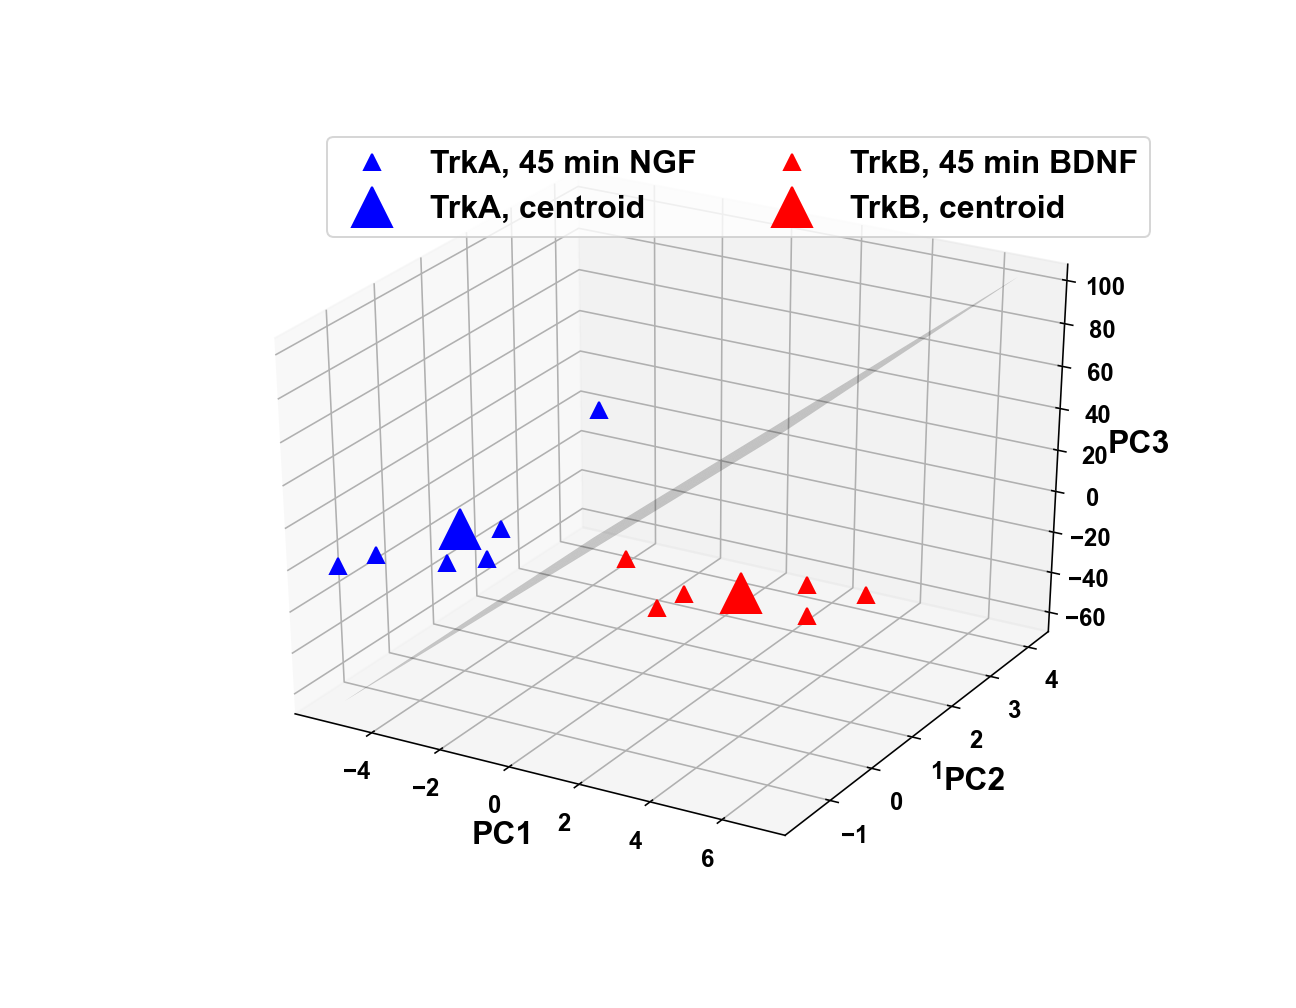

In [19]:
# projecting STV to PCA space
norm_vec_PCA = []
norm_vec_PCA.append(np.dot(PCAweights_red[0],norm_vec_red))
norm_vec_PCA.append(np.dot(PCAweights_red[1],norm_vec_red))
norm_vec_PCA.append(np.dot(PCAweights_red[2],norm_vec_red))
norm_vec_PCA = np.asarray(norm_vec_PCA)/linalg.norm(norm_vec_PCA)
print(norm_vec_PCA)

svc_PCA_red = SVC(kernel='linear')
svc_PCA_red.fit(Spca_red,cls)

z = lambda x,y: (-svc_PCA_red.intercept_[0]-norm_vec_PCA[0]*x-norm_vec_PCA[1]*y) / norm_vec_PCA[2]
tmpx = np.linspace(min(Spca_red[:,0]),max(Spca_red[:,0]),10)
tmpy = np.linspace(min(Spca_red[:,1]),max(Spca_red[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)

# plotting results
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot_surface(xs, ys, z(xs,ys),color='black',linewidth=0,alpha=0.2)

ax.plot3D(PCA_RPPA_red.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA_red.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA_red.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,2],'^',color='blue',label='TrkA, 45 min NGF',ms=8) 
ax.plot3D([np.mean(PCA_RPPA_red.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,0])],[np.mean(PCA_RPPA_red.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,1])],[np.mean(PCA_RPPA_red.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,2])],'^',color='blue',label='TrkA, centroid',ms=20) 

ax.plot3D(PCA_RPPA_red.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA_red.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA_red.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,2],'^',color='red',label='TrkB, 45 min BDNF',ms=8) 
ax.plot3D([np.mean(PCA_RPPA_red.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,0])],[np.mean(PCA_RPPA_red.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,1])],[np.mean(PCA_RPPA_red.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,2])],'^',color='red',label='TrkB, centroid',ms=20) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel,ncol=2)
plt.show()


In [20]:
Spca_full = pca_red.transform(RPPA_total_norm_red.transpose())
PCA_RPPA_full = pd.DataFrame(Spca_full,columns=['PC1','PC2','PC3'],index=RPPA_total_norm.columns)
#PCA_RPPA_full

<IPython.core.display.Javascript object>


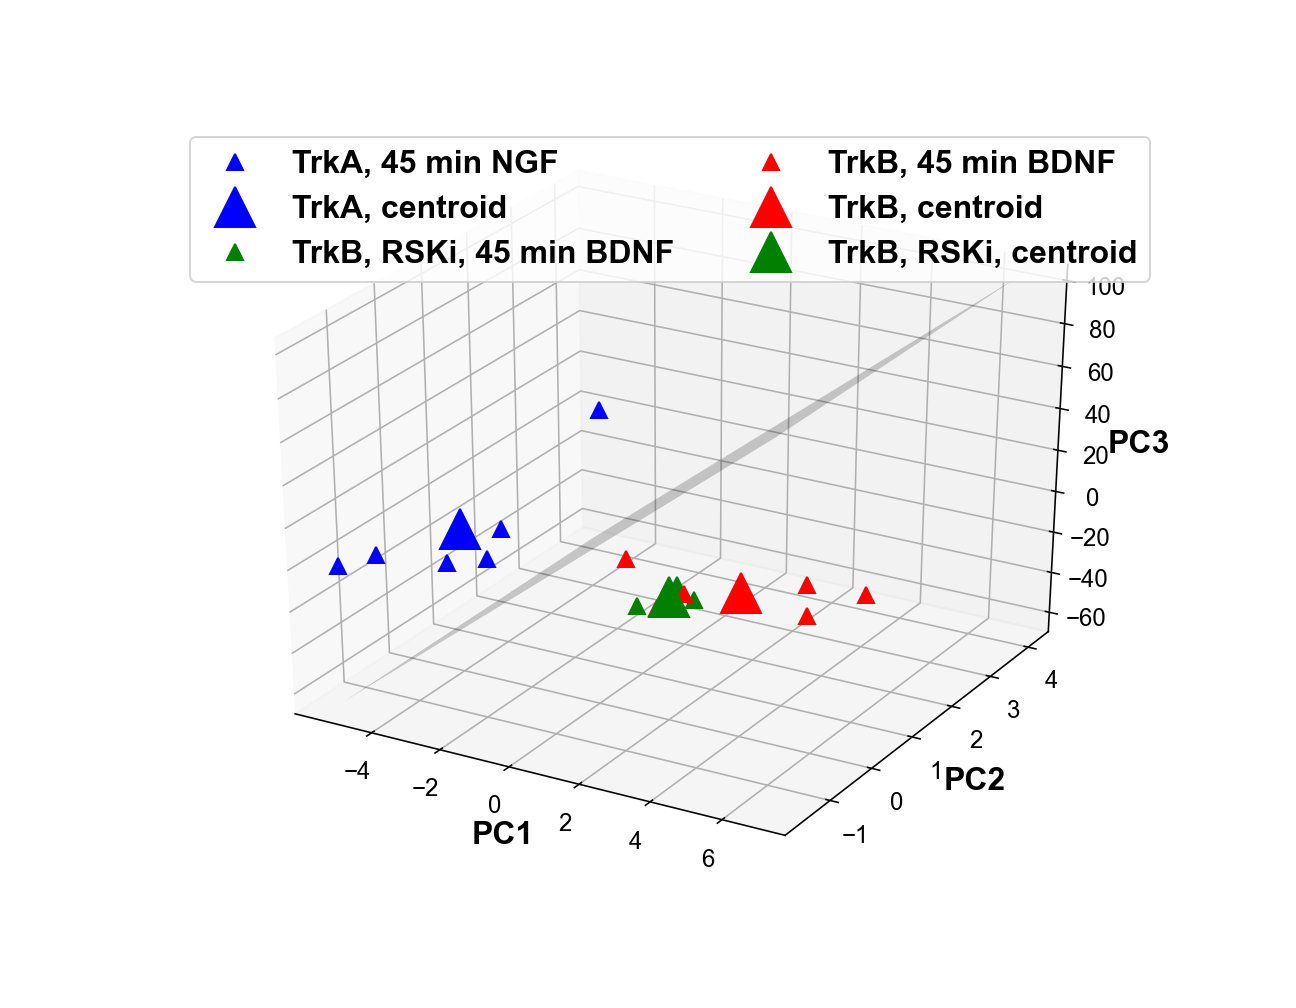

In [21]:
# plotting results + S6Ki
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot_surface(xs, ys, z(xs,ys),color='black',linewidth=0,alpha=0.2)

ax.plot3D(PCA_RPPA_full.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA_full.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA_full.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,2],'^',color='blue',label='TrkA, 45 min NGF',ms=8) 
ax.plot3D([np.mean(PCA_RPPA_full.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,0])],[np.mean(PCA_RPPA_full.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,1])],[np.mean(PCA_RPPA_full.filter(regex='TrkA_DMSO_45.*',axis=0).iloc[:,2])],'^',color='blue',label='TrkA, centroid',ms=20) 

ax.plot3D(PCA_RPPA_full.filter(regex='TrkB_RSKinh_45.*',axis=0).iloc[:,0],PCA_RPPA_full.filter(regex='TrkB_RSKinh_45.*',axis=0).iloc[:,1],PCA_RPPA_full.filter(regex='TrkB_RSKinh_45.*',axis=0).iloc[:,2],'^',color='green',label='TrkB, RSKi, 45 min BDNF',ms=8) 

ax.plot3D(PCA_RPPA_full.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,0],PCA_RPPA_full.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,1],PCA_RPPA_full.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,2],'^',color='red',label='TrkB, 45 min BDNF',ms=8) 
ax.plot3D([np.mean(PCA_RPPA_full.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,0])],[np.mean(PCA_RPPA_full.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,1])],[np.mean(PCA_RPPA_full.filter(regex='TrkB_DMSO_45.*',axis=0).iloc[:,2])],'^',color='red',label='TrkB, centroid',ms=20) 

ax.plot3D([np.mean(PCA_RPPA_full.filter(regex='TrkB_RSKinh_45.*',axis=0).iloc[:,0])],[np.mean(PCA_RPPA_full.filter(regex='TrkB_RSKinh_45.*',axis=0).iloc[:,1])],[np.mean(PCA_RPPA_full.filter(regex='TrkB_RSKinh_45.*',axis=0).iloc[:,2])],'^',color='green',label='TrkB, RSKi, centroid',ms=20) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel,ncol=2)
plt.show()


In [22]:
# now calculating dot products between perturbation vectors and STV in a reduced space
TrkA_center = RPPA_total_norm_red.filter(regex='TrkA.*DMSO_45.*').sum(axis=1) / len(RPPA_total_norm_red.filter(regex='TrkA.*DMSO_45.*').columns)
TrkB_center = RPPA_total_norm_red.filter(regex='TrkB.*DMSO_45.*').sum(axis=1) / len(RPPA_total_norm_red.filter(regex='TrkB.*DMSO_45.*').columns)
STV_pert_A = []
STV_pert_B = []
#ABs_effect_A_df = pd.DataFrame([],columns=[])
#ABs_effect_B_df = pd.DataFrame([],columns=[])
ABs_effect_A_df = RPPA_total_norm_red['norm_vec']
ABs_effect_B_df = RPPA_total_norm_red['norm_vec']

for treatment in treatments_actual:
    perturb_TrkA_cloud = RPPA_total_norm_red.filter(regex='TrkA.*'+treatment+'.*45.*')
    perturb_TrkA = perturb_TrkA_cloud.sum(axis=1) / len(perturb_TrkA_cloud.columns)
    perturb_TrkB_cloud = RPPA_total_norm_red.filter(regex='TrkB.*'+treatment+'.*45.*')
    perturb_TrkB = perturb_TrkB_cloud.sum(axis=1) / len(perturb_TrkB_cloud.columns)
    vec_TrkA = perturb_TrkA - TrkA_center
    vec_TrkB = perturb_TrkB - TrkB_center
    STV_pert_A.append([treatment,np.dot(vec_TrkA,norm_vec_red)])
    STV_pert_B.append([treatment,np.dot(vec_TrkB,norm_vec_red)])
    ABs_TrkA = []
    ABs_TrkB = []
    for AB in RPPA_total_norm_red.index:
        ABs_TrkA.append([AB,vec_TrkA.loc[AB]*RPPA_total_norm_red["norm_vec"].loc[AB]])
        ABs_TrkB.append([AB,vec_TrkB.loc[AB]*RPPA_total_norm_red["norm_vec"].loc[AB]])
    ABs_TrkA_df = pd.DataFrame(ABs_TrkA,columns=['Antibodies',treatment]).set_index('Antibodies')
    ABs_TrkB_df = pd.DataFrame(ABs_TrkB,columns=['Antibodies',treatment]).set_index('Antibodies')
    ABs_effect_A_df = pd.concat([ABs_effect_A_df,ABs_TrkA_df],axis=1)
    ABs_effect_B_df = pd.concat([ABs_effect_B_df,ABs_TrkB_df],axis=1)

STV_pert_A_df = pd.DataFrame(STV_pert_A,columns=['perturbations','STV_response']).set_index('perturbations')
STV_pert_B_df = pd.DataFrame(STV_pert_B,columns=['perturbations','STV_response']).set_index('perturbations')
print("Perturbations for TrkA cells")
print(STV_pert_A_df.sort_values(by='STV_response',ascending=False))
print("\nPerturbations for TrkB cells")
print(STV_pert_B_df.sort_values(by='STV_response',ascending=False))

Perturbations for TrkA cells
               STV_response
perturbations              
RSKinh             2.656549
JNK8inh           -0.694788
MEKinh            -1.263213
S6Kinh            -1.867636
AKTinh            -2.211122
JNKinh            -2.608601

Perturbations for TrkB cells
               STV_response
perturbations              
JNK8inh           -0.155327
MEKinh            -0.628089
RSKinh            -1.394221
AKTinh            -2.241621
S6Kinh            -8.190953
JNKinh            -9.979079


In [23]:
ABs_effect_A_df.sort_values(by='JNK8inh')

,norm_vec,JNKinh,S6Kinh,RSKinh,MEKinh,AKTinh,JNK8inh
Antibodies,,,,,,,
"S6 Ribosomal protein P Ser235,Ser236",0.868328,-2.082053,-1.757192,2.069353,-1.026598,-1.943531,-0.688774
Caspase 3 cleaved,-0.127765,0.018537,0.099095,0.041187,-0.102723,-0.112484,-0.130504
"S6 Ribosomal protein p Ser240,Ser244",0.362805,-0.445819,-0.376914,0.320631,-0.108678,-0.439617,-0.061850
c-Jun P Ser73,0.080726,-0.021057,0.033144,0.067187,-0.007591,-0.011388,-0.027539
PKC (pan) P Ser660 (beta-2),0.125741,-0.062344,-0.007662,0.065339,-0.044588,-0.005085,-0.016357
Bad P Ser136,-0.031638,0.000467,0.005624,-0.003635,0.005020,-0.001858,-0.013229
Src,-0.049237,0.003856,0.007121,-0.001253,-0.000923,0.000399,-0.009019
CrkL P Tyr207,0.115442,0.012050,0.001897,0.039497,-0.009766,-0.008619,-0.005923
CDK1 (p34cdc2) P Tyr15,0.026184,0.003499,0.000443,0.011903,-0.003944,-0.006149,-0.005816


In [24]:
# reading data on Trk signalling

Trk_norm = pd.read_csv('RPPA_data_Trk_normalized.csv').set_index("Antibodies")
Trk_norm

,TrkA_DMSO_10_r1,TrkA_DMSO_10_r2,TrkA_DMSO_10_r3,TrkA_DMSO_45_r1,TrkA_DMSO_45_r2,TrkA_DMSO_45_r3,TrkA_PI3Kinh_0_r1,TrkA_PI3Kinh_0_r2,TrkA_PI3Kinh_0_r3,TrkA_PI3Kinh_10_r1,...,TrkB_DMSO_45_r6,TrkB_MEKinh_45_r4,TrkB_MEKinh_45_r5,TrkB_MEKinh_45_r6,TrkB_AKTinh_45_r4,TrkB_AKTinh_45_r5,TrkB_AKTinh_45_r6,TrkB_JNK8inh_45_r4,TrkB_JNK8inh_45_r5,TrkB_JNK8inh_45_r6
Antibodies,,,,,,,,,,,,,,,,,,,,,
pTrk,2.18284,4.547636,5.101703,4.116548,2.568533,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# calculating log global response matrix for 45 min

module_names = ['TRK','ERK','AKT','JNK','S6K','RSK','RTK','STV']
perts = []

for treatment in treatments_output:
    for i in range(replicates_rest):
        if treatment == "JNKinh":
            perts.append("TRKinh_"+str(i+1))
        elif treatment == "JNK8inh":
            perts.append("JNKinh_"+str(i+1))
        elif treatment == "MEKinh":
            perts.append("ERKinh_"+str(i+1))
        else:
            perts.append(treatment+"_"+str(i+1))

R_global_A = pd.DataFrame(np.zeros((len(module_names),len(perts))),columns=perts,index=module_names)
R_global_B = pd.DataFrame(np.zeros((len(module_names),len(perts))),columns=perts,index=module_names)

# now we have to include Western Blot Trk data into global response matrix
for treatment in treatments_output_Trk:
    for replicate_ in range(replicates_rest):
        if treatment in treatments_1:
            replicate = replicate_ + 1
        elif treatment in treatments_2:
            replicate = replicate_ + 4
        else:
            replicate = replicate_ + 1
        if treatment == 'JNKinh':
            pert_name = 'TRKinh_'+str(replicate_+1)
        elif treatment == 'JNK8inh':
            pert_name = 'JNKinh_'+str(replicate_+1)
        elif treatment == 'MEKinh':
            pert_name = 'ERKinh_'+str(replicate_+1)
        else:
            pert_name = treatment+'_'+str(replicate_+1)
        if Trk_norm.loc["pTrk"].filter(regex='TrkA_'+treatment+'_45_r'+str(replicate)).isna()[0]:
            R_global_A[pert_name]['TRK']=NaN
        else:
            x_0 = float(Trk_norm.loc["pTrk"].filter(regex='TrkA_DMSO_45_r'+str(replicate)))
            x_1 = float(Trk_norm.loc["pTrk"].filter(regex='TrkA_'+treatment+'_45_r'+str(replicate)))
            R_global_A[pert_name]['TRK']=2*(x_1-x_0)/(x_1+x_0)
        if Trk_norm.loc["pTrk"].filter(regex='TrkB_'+treatment+'_45_r'+str(replicate)).isna()[0]:
            R_global_B[pert_name]['TRK']=NaN
        else:
            x_0 = float(Trk_norm.loc["pTrk"].filter(regex='TrkB_DMSO_45_r'+str(replicate)))
            x_1 = float(Trk_norm.loc["pTrk"].filter(regex='TrkB_'+treatment+'_45_r'+str(replicate)))
            R_global_B[pert_name]['TRK']=2*(x_1-x_0)/(x_1+x_0)
    # now we have to fill NaNs with average values
    av_value = R_global_A.loc['TRK'].filter(regex=pert_name[:-1]+'\d').dropna().mean()
    R_global_A.fillna(av_value,inplace=True)
    av_value = R_global_B.loc['TRK'].filter(regex=pert_name[:-1]+'\d').dropna().mean()
    R_global_B.fillna(av_value,inplace=True)
# now the TRK row is filled

for i in range(len(module_names[1:7])):
    for treatment in treatments_output:
        for replicate_ in range(replicates_rest):
            if treatment in treatments_1:
                replicate = replicate_ + 1
            elif treatment in treatments_2:
                replicate = replicate_ + 4
            else:
                replicate = replicate_ + 1
            if treatment == 'JNKinh':
                pert_name = 'TRKinh_'+str(replicate_+1)
            elif treatment == 'JNK8inh':
                pert_name = 'JNKinh_'+str(replicate_+1)
            elif treatment == 'MEKinh':
                pert_name = 'ERKinh_'+str(replicate_+1)
            else:
                pert_name = treatment+'_'+str(replicate_+1)
            x_0 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkA_DMSO_45_r'+str(replicate)))
            x_1 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkA_'+treatment+'_45_r'+str(replicate)))
            R_global_A[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)
            x_0 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkB_DMSO_45_r'+str(replicate)))
            x_1 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkB_'+treatment+'_45_r'+str(replicate)))
            R_global_B[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)

# now we need to fix R's for diagonal elements
for i in range(len(module_names[1:6])):
    treatment = treatments_output[i+1]
    for replicate_ in range(replicates_rest):
        if treatment in treatments_1:
            replicate = replicate_ + 1
        elif treatment in treatments_2:
            replicate = replicate_ + 4
        else:
            replicate = replicate_ + 1
        if treatment == 'JNKinh':
            pert_name = 'TRKinh_'+str(replicate_+1)
        elif treatment == 'JNK8inh':
            pert_name = 'JNKinh_'+str(replicate_+1)
        elif treatment == 'MEKinh':
            pert_name = 'ERKinh_'+str(replicate_+1)
        else:
            pert_name = treatment+'_'+str(replicate_+1)
        x_0 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkA_DMSO_45_r'+str(replicate)))
        x_1 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkA_'+treatment+'_45_r'+str(replicate)))
        R_global_A[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)
        x_0 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkB_DMSO_45_r'+str(replicate)))
        x_1 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkB_'+treatment+'_45_r'+str(replicate)))
        R_global_B[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)

# now we need to fill STV module row
for treatment in treatments_output:
    for replicate_ in range(replicates_rest):
        if treatment in treatments_1:
            replicate = replicate_ + 1
        elif treatment in treatments_2:
            replicate = replicate_ + 4
        else:
            replicate = replicate_ + 1
        if treatment == 'JNKinh':
            pert_name = 'TRKinh_'+str(replicate_+1)
        elif treatment == 'JNK8inh':
            pert_name = 'JNKinh_'+str(replicate_+1)
        elif treatment == 'MEKinh':
            pert_name = 'ERKinh_'+str(replicate_+1)
        else:
            pert_name = treatment+'_'+str(replicate_+1)
        x_0 = (b_red - np.dot(RPPA_total_norm_red['TrkA_DMSO_45_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        x_1 = (b_red - np.dot(RPPA_total_norm_red['TrkA_'+treatment+'_45_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        R_global_A[pert_name]["STV"]=(x_1-x_0)/np.abs(x_0)
        x_0 = (b_red - np.dot(RPPA_total_norm_red['TrkB_DMSO_45_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        x_1 = (b_red - np.dot(RPPA_total_norm_red['TrkB_'+treatment+'_45_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        R_global_B[pert_name]["STV"]=(x_1-x_0)/np.abs(x_0)

R_global_A.fillna(0,inplace=True)
R_global_B.fillna(0,inplace=True)

In [26]:
R_global_A.to_csv('R_log_TrkA_45.csv')
R_global_A

,TRKinh_1,TRKinh_2,TRKinh_3,ERKinh_1,ERKinh_2,ERKinh_3,AKTinh_1,AKTinh_2,AKTinh_3,JNKinh_1,JNKinh_2,JNKinh_3,S6Kinh_1,S6Kinh_2,S6Kinh_3,RSKinh_1,RSKinh_2,RSKinh_3
TRK,-1.401741,-1.401741,-1.401741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERK,-1.043602,-1.165030,-1.184094,-0.887683,-0.815612,-0.777334,0.239119,0.230790,0.156293,-0.135365,-0.028452,0.096620,-0.153049,-0.218711,-0.035195,0.303766,0.447412,0.521705
AKT,-1.036819,-1.114033,-1.085954,0.037464,0.064678,0.141443,-1.083096,-1.110501,-1.137679,-0.012488,-0.007729,0.270302,0.414661,0.204423,0.526397,-0.068843,-0.160921,0.095910
JNK,0.026695,-0.117042,-0.217564,-0.203763,-0.082406,-0.032050,-0.237146,-0.090502,-0.115696,-0.131186,-0.519845,-0.036956,-0.174903,-0.356139,-0.191484,0.185054,0.296703,0.187339
S6K,-0.555857,-0.607632,-0.589329,-0.031528,-0.019363,0.106490,-0.674316,-0.610582,-0.708694,-0.027623,-0.000050,0.230842,-1.438131,-1.461531,-1.495596,0.107268,0.286687,0.259902
RSK,-0.227792,-0.345358,-0.416776,-0.181683,-0.172846,-0.049405,0.072887,0.059778,-0.057708,-0.112681,-0.056853,0.207834,-0.155055,-0.278854,-0.134411,-0.224637,-0.150675,-0.128870
RTK,-0.284715,-0.581766,-0.573118,-0.087173,-0.119945,-0.125480,0.224111,0.171311,-0.100508,-0.141565,0.047535,0.009355,-0.623990,-0.689110,-0.790133,0.198863,0.246165,0.178804
STV,1.696591,1.788199,1.987958,-0.140240,0.157050,0.173147,0.317590,0.153193,0.258636,-0.201183,-0.534894,0.108691,1.022362,1.054998,1.625010,-0.575991,-0.759666,-0.729162


In [27]:
R_global_B.to_csv('R_log_TrkB_45.csv')
R_global_B

,TRKinh_1,TRKinh_2,TRKinh_3,ERKinh_1,ERKinh_2,ERKinh_3,AKTinh_1,AKTinh_2,AKTinh_3,JNKinh_1,JNKinh_2,JNKinh_3,S6Kinh_1,S6Kinh_2,S6Kinh_3,RSKinh_1,RSKinh_2,RSKinh_3
TRK,-0.874832,-0.874832,-0.874832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERK,-1.003571,-0.925000,-0.851826,-0.025853,-0.057220,-0.361926,0.113826,0.170690,-0.218608,0.136150,0.131347,-0.065605,-0.065032,0.019879,0.114518,-0.086512,0.095523,0.157588
AKT,-1.428669,-1.463816,-1.406679,0.165928,0.003549,-0.077406,-1.013888,-0.996780,-1.156973,0.176118,0.046227,-0.050731,0.202168,0.238409,0.208882,-0.235577,-0.097991,-0.039386
JNK,-0.784289,-0.549554,-0.564453,0.102714,0.077057,-0.191061,0.153647,0.267618,-0.147841,-0.154430,-0.361255,-0.441769,0.052281,0.009713,0.104377,0.182874,0.235183,0.338617
S6K,-0.963394,-0.820583,-0.724031,0.190123,-0.006559,-0.359508,-0.311089,-0.304195,-0.751336,0.237209,0.058600,-0.147065,-1.416836,-1.423572,-1.338602,-0.090280,0.001694,0.225379
RSK,-0.657159,-0.387043,-0.400261,0.091570,-0.055146,-0.273924,0.179146,0.125430,-0.231526,0.190378,0.018385,-0.150331,0.004492,0.105551,0.252028,-0.505091,-0.326492,-0.142370
RTK,-1.347612,-1.220830,-1.150246,0.175558,0.031419,-0.136392,-0.020915,-0.026789,-0.452721,0.161520,-0.051038,-0.083613,-0.126714,0.072703,0.107747,-0.541571,-0.362370,-0.362779
STV,1.599065,1.875584,1.860790,-0.292164,0.012469,0.268445,0.245707,0.154787,0.534997,-0.101815,0.030346,0.191591,1.334605,1.492316,1.445651,0.309792,0.079808,0.204461


In [28]:
# calculating log global response matrix for 10 min

module_names = ['TRK','ERK','AKT','JNK','S6K','RSK','RTK','STV']
perts = []

for treatment in treatments_output:
    for i in range(replicates_rest):
        if treatment == "JNKinh":
            perts.append("TRKinh_"+str(i+1))
        elif treatment == "JNK8inh":
            perts.append("JNKinh_"+str(i+1))
        elif treatment == "MEKinh":
            perts.append("ERKinh_"+str(i+1))
        else:
            perts.append(treatment+"_"+str(i+1))

R_global_A = pd.DataFrame(np.zeros((len(module_names),len(perts))),columns=perts,index=module_names)
R_global_B = pd.DataFrame(np.zeros((len(module_names),len(perts))),columns=perts,index=module_names)

# now we have to include Western Blot Trk data into global response matrix
for treatment in treatments_output_Trk:
    for replicate_ in range(replicates_rest):
        if treatment in treatments_1:
            replicate = replicate_ + 1
        elif treatment in treatments_2:
            replicate = replicate_ + 4
        else:
            replicate = replicate_ + 1
        if treatment == 'JNKinh':
            pert_name = 'TRKinh_'+str(replicate_+1)
        elif treatment == 'JNK8inh':
            pert_name = 'JNKinh_'+str(replicate_+1)
        elif treatment == 'MEKinh':
            pert_name = 'ERKinh_'+str(replicate_+1)
        else:
            pert_name = treatment+'_'+str(replicate_+1)
        if Trk_norm.loc["pTrk"].filter(regex='TrkA_'+treatment+'_10_r'+str(replicate)).isna()[0]:
            R_global_A[pert_name]['TRK']=NaN
        else:
            x_0 = float(Trk_norm.loc["pTrk"].filter(regex='TrkA_DMSO_10_r'+str(replicate)))
            x_1 = float(Trk_norm.loc["pTrk"].filter(regex='TrkA_'+treatment+'_10_r'+str(replicate)))
            R_global_A[pert_name]['TRK']=2*(x_1-x_0)/(x_1+x_0)
        if Trk_norm.loc["pTrk"].filter(regex='TrkB_'+treatment+'_10_r'+str(replicate)).isna()[0]:
            R_global_B[pert_name]['TRK']=NaN
        else:
            x_0 = float(Trk_norm.loc["pTrk"].filter(regex='TrkB_DMSO_10_r'+str(replicate)))
            x_1 = float(Trk_norm.loc["pTrk"].filter(regex='TrkB_'+treatment+'_10_r'+str(replicate)))
            R_global_B[pert_name]['TRK']=2*(x_1-x_0)/(x_1+x_0)
    # now we have to fill NaNs with average values
    av_value = R_global_A.loc['TRK'].filter(regex=pert_name[:-1]+'\d').dropna().mean()
    R_global_A.fillna(av_value,inplace=True)
    av_value = R_global_B.loc['TRK'].filter(regex=pert_name[:-1]+'\d').dropna().mean()
    R_global_B.fillna(av_value,inplace=True)
# now the TRK row is filled

for i in range(len(module_names[1:7])):
    for treatment in treatments_output:
        for replicate_ in range(replicates_rest):
            if treatment in treatments_1:
                replicate = replicate_ + 1
            elif treatment in treatments_2:
                replicate = replicate_ + 4
            else:
                replicate = replicate_ + 1
            if treatment == 'JNKinh':
                pert_name = 'TRKinh_'+str(replicate_+1)
            elif treatment == 'JNK8inh':
                pert_name = 'JNKinh_'+str(replicate_+1)
            elif treatment == 'MEKinh':
                pert_name = 'ERKinh_'+str(replicate_+1)
            else:
                pert_name = treatment+'_'+str(replicate_+1)
            x_0 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkA_DMSO_10_r'+str(replicate)))
            x_1 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkA_'+treatment+'_10_r'+str(replicate)))
            R_global_A[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)
            x_0 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkB_DMSO_10_r'+str(replicate)))
            x_1 = float(RPPA_total_norm.loc[modules_output[i]].sum(axis=0).filter(regex='TrkB_'+treatment+'_10_r'+str(replicate)))
            R_global_B[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)

# now we need to fix R's for diagonal elements
for i in range(len(module_names[1:6])):
    treatment = treatments_output[i+1]
    for replicate_ in range(replicates_rest):
        if treatment in treatments_1:
            replicate = replicate_ + 1
        elif treatment in treatments_2:
            replicate = replicate_ + 4
        else:
            replicate = replicate_ + 1
        if treatment == 'JNKinh':
            pert_name = 'TRKinh_'+str(replicate_+1)
        elif treatment == 'JNK8inh':
            pert_name = 'JNKinh_'+str(replicate_+1)
        elif treatment == 'MEKinh':
            pert_name = 'ERKinh_'+str(replicate_+1)
        else:
            pert_name = treatment+'_'+str(replicate_+1)
        x_0 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkA_DMSO_10_r'+str(replicate)))
        x_1 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkA_'+treatment+'_10_r'+str(replicate)))
        R_global_A[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)
        x_0 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkB_DMSO_10_r'+str(replicate)))
        x_1 = float(RPPA_total_norm.loc[modules_output_diag[i]].sum(axis=0).filter(regex='TrkB_'+treatment+'_10_r'+str(replicate)))
        R_global_B[pert_name][module_names[i+1]]=2*(x_1-x_0)/(x_1+x_0)

# now we need to fill STV module row
for treatment in treatments_output:
    for replicate_ in range(replicates_rest):
        if treatment in treatments_1:
            replicate = replicate_ + 1
        elif treatment in treatments_2:
            replicate = replicate_ + 4
        else:
            replicate = replicate_ + 1
        if treatment == 'JNKinh':
            pert_name = 'TRKinh_'+str(replicate_+1)
        elif treatment == 'JNK8inh':
            pert_name = 'JNKinh_'+str(replicate_+1)
        elif treatment == 'MEKinh':
            pert_name = 'ERKinh_'+str(replicate_+1)
        else:
            pert_name = treatment+'_'+str(replicate_+1)
        x_0 = (b_red - np.dot(RPPA_total_norm_red['TrkA_DMSO_10_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        x_1 = (b_red - np.dot(RPPA_total_norm_red['TrkA_'+treatment+'_10_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        R_global_A[pert_name]["STV"]=(x_1-x_0)/np.abs(x_0)
        x_0 = (b_red - np.dot(RPPA_total_norm_red['TrkB_DMSO_10_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        x_1 = (b_red - np.dot(RPPA_total_norm_red['TrkB_'+treatment+'_10_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        R_global_B[pert_name]["STV"]=(x_1-x_0)/np.abs(x_0)

R_global_A.fillna(0,inplace=True)
R_global_B.fillna(0,inplace=True)

In [29]:
R_global_A.to_csv('R_log_TrkA_10.csv')
R_global_A

,TRKinh_1,TRKinh_2,TRKinh_3,ERKinh_1,ERKinh_2,ERKinh_3,AKTinh_1,AKTinh_2,AKTinh_3,JNKinh_1,JNKinh_2,JNKinh_3,S6Kinh_1,S6Kinh_2,S6Kinh_3,RSKinh_1,RSKinh_2,RSKinh_3
TRK,-0.844163,-1.209568,-1.574973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERK,-1.493797,-1.497989,-1.505481,-0.610719,-0.421638,-0.572254,0.297606,0.196910,0.111985,-0.113726,-0.126677,-0.089561,0.034976,0.066168,0.070182,0.230811,0.341363,0.309609
AKT,-1.014803,-1.092714,-1.033388,-0.109184,0.100769,0.008626,-1.141155,-1.238062,-1.246438,-0.140205,-0.166723,0.008533,0.374247,0.443225,0.470460,0.044714,0.219456,0.093569
JNK,-0.120163,-0.202391,-0.222348,-0.251476,-0.035081,-0.063203,0.135693,0.190783,0.232351,-0.211849,-0.374406,-0.581911,-0.202507,-0.172185,-0.221811,0.062505,0.090449,0.022093
S6K,-0.471109,-0.608025,-0.429261,-0.105289,-0.032331,-0.169988,-0.740676,-0.792252,-0.809528,-0.131252,-0.230561,-0.063980,-1.663607,-1.479039,-1.572632,-0.245863,-0.118538,-0.142973
RSK,-0.176428,-0.246114,-0.316895,-0.186662,-0.094950,-0.129449,0.168169,0.090336,-0.007570,-0.117119,-0.078208,-0.039434,-0.130968,-0.066798,-0.039490,-0.490366,-0.182090,-0.400808
RTK,-0.187481,-0.378224,-0.321392,-0.072080,-0.375284,0.010218,0.219460,-0.459968,0.104507,-0.060616,-0.703732,0.075078,-0.392136,-0.522493,-0.546532,0.090163,0.101250,-0.023614
STV,0.533208,0.336020,0.466829,-0.135316,0.142246,-0.038127,0.168700,0.681511,0.197513,-0.142470,-0.225220,-0.025312,0.144383,0.198379,0.305919,-0.039223,0.025355,0.121646


In [30]:
R_global_B.to_csv('R_log_TrkB_10.csv')
R_global_B

,TRKinh_1,TRKinh_2,TRKinh_3,ERKinh_1,ERKinh_2,ERKinh_3,AKTinh_1,AKTinh_2,AKTinh_3,JNKinh_1,JNKinh_2,JNKinh_3,S6Kinh_1,S6Kinh_2,S6Kinh_3,RSKinh_1,RSKinh_2,RSKinh_3
TRK,-1.238476,-1.490628,-1.364552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERK,-0.810168,-0.704175,-0.892699,-0.322880,-0.017976,-0.194959,-0.139241,-0.011118,0.060877,-0.338710,0.152735,-0.120689,-0.258581,0.067964,0.050408,-0.119037,-0.066030,0.056004
AKT,-1.514608,-1.429823,-1.609915,-0.247961,0.045096,-0.083546,-1.291391,-1.282244,-1.186877,-0.113121,0.114560,-0.167760,0.025482,0.251461,0.126115,-0.196287,-0.204746,-0.074582
JNK,-0.742575,-0.583293,-0.820027,-0.182932,0.073146,-0.026025,-0.114020,0.090997,0.244582,-0.232360,0.096071,-0.308751,-0.491515,-0.154645,-0.039100,-0.069302,0.002506,0.185811
S6K,-0.770588,-0.744338,-0.792661,-0.240671,-0.082480,-0.084939,-0.670615,-0.706872,-0.591030,-0.259118,0.096302,-0.144242,-1.249622,-1.151692,-1.161779,-0.187462,-0.200304,-0.104498
RSK,-0.725399,-0.628714,-0.717009,-0.217998,0.006682,-0.101923,-0.098669,-0.060516,0.074515,-0.020578,0.069987,-0.122436,-0.267446,0.075135,0.106002,-0.474665,-0.410165,-0.305582
RTK,-1.628061,-1.587276,-1.631837,-0.217196,-0.129518,-0.128159,-0.242014,-0.210892,-0.106431,-0.157933,0.200867,-0.141538,-0.388433,-0.093570,0.002178,-0.447036,-0.405841,-0.221833
STV,0.454170,0.654278,0.632462,0.202696,0.138937,0.010048,0.913047,0.353406,0.601873,-0.556972,-0.208156,0.003457,0.282901,0.633060,0.525000,0.101788,0.297790,0.363323


In [31]:
# preparing data for fitting - DMSO part
time_points = [0,10,45]
module_names = ['FC_ppERK','FC_pAKT','FC_pJNK','FC_pS6K','FC_pRSK','FC_pAdRTK']
module_names_err = []
for name in module_names:
    module_names_err.append(name + "_SD")

timecourse_A = pd.DataFrame(np.zeros((len(time_points),len(module_names + module_names_err))),columns=module_names + module_names_err,index=time_points)
timecourse_B = pd.DataFrame(np.zeros((len(time_points),len(module_names + module_names_err))),columns=module_names + module_names_err,index=time_points)

for tpnt in time_points[1:]:
    for i in range(len(module_names)):
        TrkA_pnt = statistics.mean(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkA.*DMSO.*' + str(tpnt) + '.*'))
        TrkA_pnt_err = stats.sem(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkA.*DMSO.*' + str(tpnt) + '.*'))
        TrkB_pnt = statistics.mean(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkB.*DMSO.*' + str(tpnt) + '.*'))
        TrkB_pnt_err = stats.sem(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkB.*DMSO.*' + str(tpnt) + '.*'))
        timecourse_A[module_names[i]][tpnt] = TrkA_pnt
        timecourse_A[module_names_err[i]][tpnt] = TrkA_pnt_err
        timecourse_B[module_names[i]][tpnt] = TrkB_pnt
        timecourse_B[module_names_err[i]][tpnt] = TrkB_pnt_err

for i in range(len(module_names)):
    timecourse_A[module_names[i]][0] = 1.0
    timecourse_A[module_names_err[i]][0] = statistics.mean([timecourse_A[module_names_err[i]][10],timecourse_A[module_names_err[i]][45]])
    timecourse_B[module_names[i]][0] = 1.0
    timecourse_B[module_names_err[i]][0] = statistics.mean([timecourse_B[module_names_err[i]][10],timecourse_B[module_names_err[i]][45]])

timecourse_A.index.name = 'time'
timecourse_B.index.name = 'time'

In [32]:
timecourse_A.to_csv('timecourse2_A.exp',sep='\t')
timecourse_A

,FC_ppERK,FC_pAKT,FC_pJNK,FC_pS6K,FC_pRSK,FC_pAdRTK,FC_ppERK_SD,FC_pAKT_SD,FC_pJNK_SD,FC_pS6K_SD,FC_pRSK_SD,FC_pAdRTK_SD
time,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.363848,0.133855,0.078149,0.048986,0.052156,0.137360
10,3.804499,1.349050,1.072476,1.097435,1.171887,1.458432,0.365318,0.112305,0.091339,0.055326,0.047200,0.157626
45,3.047969,1.580255,1.122088,1.042882,1.184213,1.385795,0.362379,0.155406,0.064958,0.042646,0.057113,0.117095


In [33]:
timecourse_B.to_csv('timecourse2_B.exp',sep='\t')
timecourse_B

,FC_ppERK,FC_pAKT,FC_pJNK,FC_pS6K,FC_pRSK,FC_pAdRTK,FC_ppERK_SD,FC_pAKT_SD,FC_pJNK_SD,FC_pS6K_SD,FC_pRSK_SD,FC_pAdRTK_SD
time,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.052460,0.655414,0.093066,0.109606,0.081287,1.039075
10,7.537082,6.112708,1.420657,1.349311,1.612890,10.082633,1.038219,0.705029,0.106033,0.051230,0.063022,1.597288
45,7.399120,6.197632,1.261020,1.964102,1.608888,6.701622,1.066702,0.605798,0.080099,0.167982,0.099553,0.480861


In [34]:
# preparing data for fitting - perturbations part
time_points = [10,45]
module_names = ['FC_ppERK','FC_pAKT','FC_pJNK','FC_pS6K','FC_pRSK','FC_pAdRTK']
module_names_err = []
for name in module_names:
    module_names_err.append(name + "_SD")

for treatment in treatments_output:
    timecourse_A_pert = pd.DataFrame(np.zeros((len(time_points),len(module_names + module_names_err))),columns=module_names + module_names_err,index=time_points)
    timecourse_B_pert = pd.DataFrame(np.zeros((len(time_points),len(module_names + module_names_err))),columns=module_names + module_names_err,index=time_points)
    timecourse_A_pert.index.name = 'time'
    timecourse_B_pert.index.name = 'time'
    for tpnt in time_points:
        for i in range(len(module_names)):
            if treatment == 'JNKinh':
                pert_name = 'TRKinh'
            elif treatment == 'JNK8inh':
                pert_name = 'JNKinh'
            elif treatment == 'MEKinh':
                pert_name = 'ERKinh'
            else:
                pert_name = treatment
            TrkA_pnt = statistics.mean(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkA.*'+treatment+'.*' + str(tpnt) + '.*'))
            TrkA_pnt_err = stats.sem(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkA.*'+treatment+'.*' + str(tpnt) + '.*'))
            TrkB_pnt = statistics.mean(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkB.*'+treatment+'.*' + str(tpnt) + '.*'))
            TrkB_pnt_err = stats.sem(RPPA_total_norm.loc[modules_output[i][0]].filter(regex='TrkB.*'+treatment+'.*' + str(tpnt) + '.*'))
            timecourse_A_pert[module_names[i]][tpnt] = TrkA_pnt
            timecourse_A_pert[module_names_err[i]][tpnt] = TrkA_pnt_err
            timecourse_B_pert[module_names[i]][tpnt] = TrkB_pnt
            timecourse_B_pert[module_names_err[i]][tpnt] = TrkB_pnt_err
    timecourse_A_pert.to_csv('timecourse2_A_' + pert_name + '.exp',sep='\t')
    timecourse_B_pert.to_csv('timecourse2_B_' + pert_name + '.exp',sep='\t')


In [35]:
# now we have to fill STV module points - DMSO
time_points = [0,10,45]
Smodule_names = ['Sval','Sval_SD']
timecourse_A_S = pd.DataFrame(np.zeros((len(time_points),len(Smodule_names))),columns=Smodule_names,index=time_points)
timecourse_A_S.index.name='time'
timecourse_B_S = pd.DataFrame(np.zeros((len(time_points),len(Smodule_names))),columns=Smodule_names,index=time_points)
timecourse_B_S.index.name='time'

for tpnt in time_points:
    S_A = []
    S_B = []
    for replicate_ in range(replicates_DMSO):
        replicate = replicate_ + 1
        #if tpnt == 0:
        #    S_A_val = -(b_red - np.dot(np.ones(len(n_vec_red)),n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        #    S_B_val = -(b_red - np.dot(np.ones(len(n_vec_red)),n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        #    S_A.append(S_A_val)
        #    S_B.append(S_B_val)
        #else:
        S_A_val = -(b_red - np.dot(RPPA_total_norm_red['TrkA_DMSO_'+ str(tpnt) +'_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        S_B_val = -(b_red - np.dot(RPPA_total_norm_red['TrkB_DMSO_'+ str(tpnt) +'_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
        S_A.append(S_A_val)
        S_B.append(S_B_val)
    timecourse_A_S['Sval'][tpnt] = statistics.mean(S_A)
    timecourse_B_S['Sval'][tpnt] = statistics.mean(S_B)
    if tpnt != 0:
        timecourse_A_S['Sval_SD'][tpnt] = stats.sem(S_A)
        timecourse_B_S['Sval_SD'][tpnt] = stats.sem(S_B)

#timecourse_A['Sval_SD'][0] = statistics.mean([timecourse_A['Sval_SD'][10],timecourse_A['Sval_SD'][45]])
#timecourse_B['Sval_SD'][0] = statistics.mean([timecourse_B['Sval_SD'][10],timecourse_B['Sval_SD'][45]])


In [36]:
timecourse_A_S.to_csv('timecourse_A_S.exp',sep='\t')
timecourse_A_S

,Sval,Sval_SD
time,,
0,-3.794948,0.000000
10,-3.322345,0.243939
45,-2.312873,0.308081


In [37]:
timecourse_B_S.to_csv('timecourse_B_S.exp',sep='\t')
timecourse_B_S

,Sval,Sval_SD
time,,
0,-3.794948,0.000000
10,-2.125368,0.168909
45,5.722422,0.599511


In [38]:
# now we have to fill STV module points - perturbations
time_points = [10,45]
Smodule_names = ['Sval','Sval_SD']

for treatment in treatments_output:
    timecourse_A_S_pert = pd.DataFrame(np.zeros((len(time_points),len(Smodule_names))),columns=Smodule_names,index=time_points)
    timecourse_A_S_pert.index.name='time'
    timecourse_B_S_pert = pd.DataFrame(np.zeros((len(time_points),len(Smodule_names))),columns=Smodule_names,index=time_points)
    timecourse_B_S_pert.index.name='time'
    for tpnt in time_points:
        S_A = []
        S_B = []
        for replicate_ in range(replicates_rest):
            if treatment in treatments_1:
                replicate = replicate_ + 1
            elif treatment in treatments_2:
                replicate = replicate_ + 4
            else:
                replicate = replicate_ + 1
            if treatment == 'JNKinh':
                pert_name = 'TRKinh'
            elif treatment == 'JNK8inh':
                pert_name = 'JNKinh'
            elif treatment == 'MEKinh':
                pert_name = 'ERKinh'
            else:
                pert_name = treatment
            #if tpnt == 0:
            #    S_A_val = -(b_red - np.dot(np.ones(len(n_vec_red)),n_vec_red))/np.dot(norm_vec_red,n_vec_red)
            #    S_B_val = -(b_red - np.dot(np.ones(len(n_vec_red)),n_vec_red))/np.dot(norm_vec_red,n_vec_red)
            #    S_A.append(S_A_val)
            #    S_B.append(S_B_val)
            #else:
            S_A_val = -(b_red - np.dot(RPPA_total_norm_red['TrkA_'+treatment+'_'+ str(tpnt) +'_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
            S_B_val = -(b_red - np.dot(RPPA_total_norm_red['TrkB_'+treatment+'_'+ str(tpnt) +'_r'+str(replicate)],n_vec_red))/np.dot(norm_vec_red,n_vec_red)
            S_A.append(S_A_val)
            S_B.append(S_B_val)
        timecourse_A_S_pert['Sval'][tpnt] = statistics.mean(S_A)
        timecourse_B_S_pert['Sval'][tpnt] = statistics.mean(S_B)
        timecourse_A_S_pert['Sval_SD'][tpnt] = stats.sem(S_A)
        timecourse_B_S_pert['Sval_SD'][tpnt] = stats.sem(S_B)
    #print(timecourse_A_S_pert)
    #print(timecourse_B_S_pert)
    timecourse_A_S_pert.to_csv('timecourse2_A_S_' + pert_name + '.exp',sep='\t')
    timecourse_B_S_pert.to_csv('timecourse2_B_S_' + pert_name + '.exp',sep='\t')

